# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [40]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

import os

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removing and setting the limit for the number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Building model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Tuning different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Getting diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Suppressing warning
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load marketing dataset into a pandas dataframe, check file presence and provide useful output
file_path = "/content/drive/MyDrive/Colab Notebooks/ExtraaLearn.csv"
if os.path.exists(file_path):
    data = pd.read_csv(file_path, sep=",")
    print("Dataset loaded.")
else:
    print("File not found:", file_path)

Dataset loaded.


## Data Overview

In [4]:
# Beginning of the Data Overview
data.shape

(4612, 15)

In [5]:
# Checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# Displaying the first 5 and last 10 rows of the dataframe
pd.concat([data.head(), data.iloc[-10:]])

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
4602,EXT4603,47,Professional,Website,Medium,4,339,2.06800,Email Activity,No,No,No,No,No,0
4603,EXT4604,26,Professional,Website,Medium,4,150,2.14900,Website Activity,No,No,No,No,No,0
4604,EXT4605,58,Professional,Website,Medium,2,555,3.30500,Website Activity,No,No,No,No,No,1
4605,EXT4606,49,Professional,Mobile App,Medium,5,253,3.67700,Website Activity,No,No,No,No,No,0
4606,EXT4607,58,Unemployed,Mobile App,High,7,210,3.59800,Email Activity,No,No,No,No,No,0


In [7]:
# Copying the data to another variable to avoid any changes to original data
leads = data.copy()

In [8]:
# Beginning of the Sanity Checks
# (1) Check for missing values
leads.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [9]:
# (2) Check for duplicate values
leads.duplicated().sum()

np.int64(0)

In [10]:
# (3) Making a list of all categorical variables
cat_col = list(leads.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

ID
EXT4612    1
EXT001     1
EXT002     1
EXT003     1
EXT4596    1
          ..
EXT009     1
EXT008     1
EXT007     1
EXT006     1
EXT005     1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [11]:
# (4) Check the number of unique values (since theay are useless for the model)
leads["ID"].nunique()

4612

In [12]:
# (5) Drop "ID"
leads.drop(["ID"], axis=1, inplace=True)

In [13]:
# Checking the statistical summary of the data
leads.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4612.00000,NaN,NaN,NaN,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.00000,NaN,NaN,NaN,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,NaN,NaN,NaN,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,NaN,NaN,NaN,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,4612,2,No,4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**:

*Dataset composition*:

The dataset contains 4,612 rows and 15 columns. All fields are complete—no missing values are present in any column. The `ID` column is unique for each record (4,612 distinct values) and contains no duplicates; it is therefore a pure identifier and has been removed before modeling.

*Types of variables*:

The dataset includes: 4 numerical variables (`age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`); 1 float variable (`page_views_per_visit`); 10 categorical variables (e.g., `current_occupation`, `profile_completed`, `last_activity`, etc.). The target variable is status (0 = not converted, 1 = converted).

*Initial descriptive insights*:

Some numerical values show wide ranges (e.g., `time_spent_on_website`), suggesting the potential presence of outliers that will need further investigation. Features like `website_visits` and `page_views_per_visit` display non-uniform distributions, indicating diverse patterns of user engagement. The time_spent_on_website variable does not specify units; however, based on the value distribution (e.g., 83, 330, 1639), I assume it is measured in minutes.

*Duplicates and data integrity*:

No duplicate records were found. The dataset is therefore in structurally good shape and ready for the preprocessing and modeling phases.

## Exploratory Data Analysis (EDA)

- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?


Conversion rate by 'current_occupation':


,current_occupation,conversion_rate
0,Professional,0.35512
2,Unemployed,0.26579
1,Student,0.11712



Conversion rate by 'first_interaction':


,first_interaction,conversion_rate
1,Website,0.45594
0,Mobile App,0.10531



Conversion rate by 'profile_completed':


,profile_completed,conversion_rate
0,High,0.41784
2,Medium,0.18876
1,Low,0.07477



Conversion rate by 'last_activity':


,last_activity,conversion_rate
2,Website Activity,0.38455
0,Email Activity,0.30334
1,Phone Activity,0.21313



Conversion rate by 'referral':


,referral,conversion_rate
1,Yes,0.67742
0,No,0.29077



Conversion rate by 'digital_media':


,digital_media,conversion_rate
1,Yes,0.31879
0,No,0.29596



Conversion rate by 'educational_channels':


,educational_channels,conversion_rate
0,No,0.30202
1,Yes,0.27943



Conversion rate by 'print_media_type1':


,print_media_type1,conversion_rate
1,Yes,0.31992
0,No,0.29599



Conversion rate by 'print_media_type2':


,print_media_type2,conversion_rate
1,Yes,0.32189
0,No,0.29733


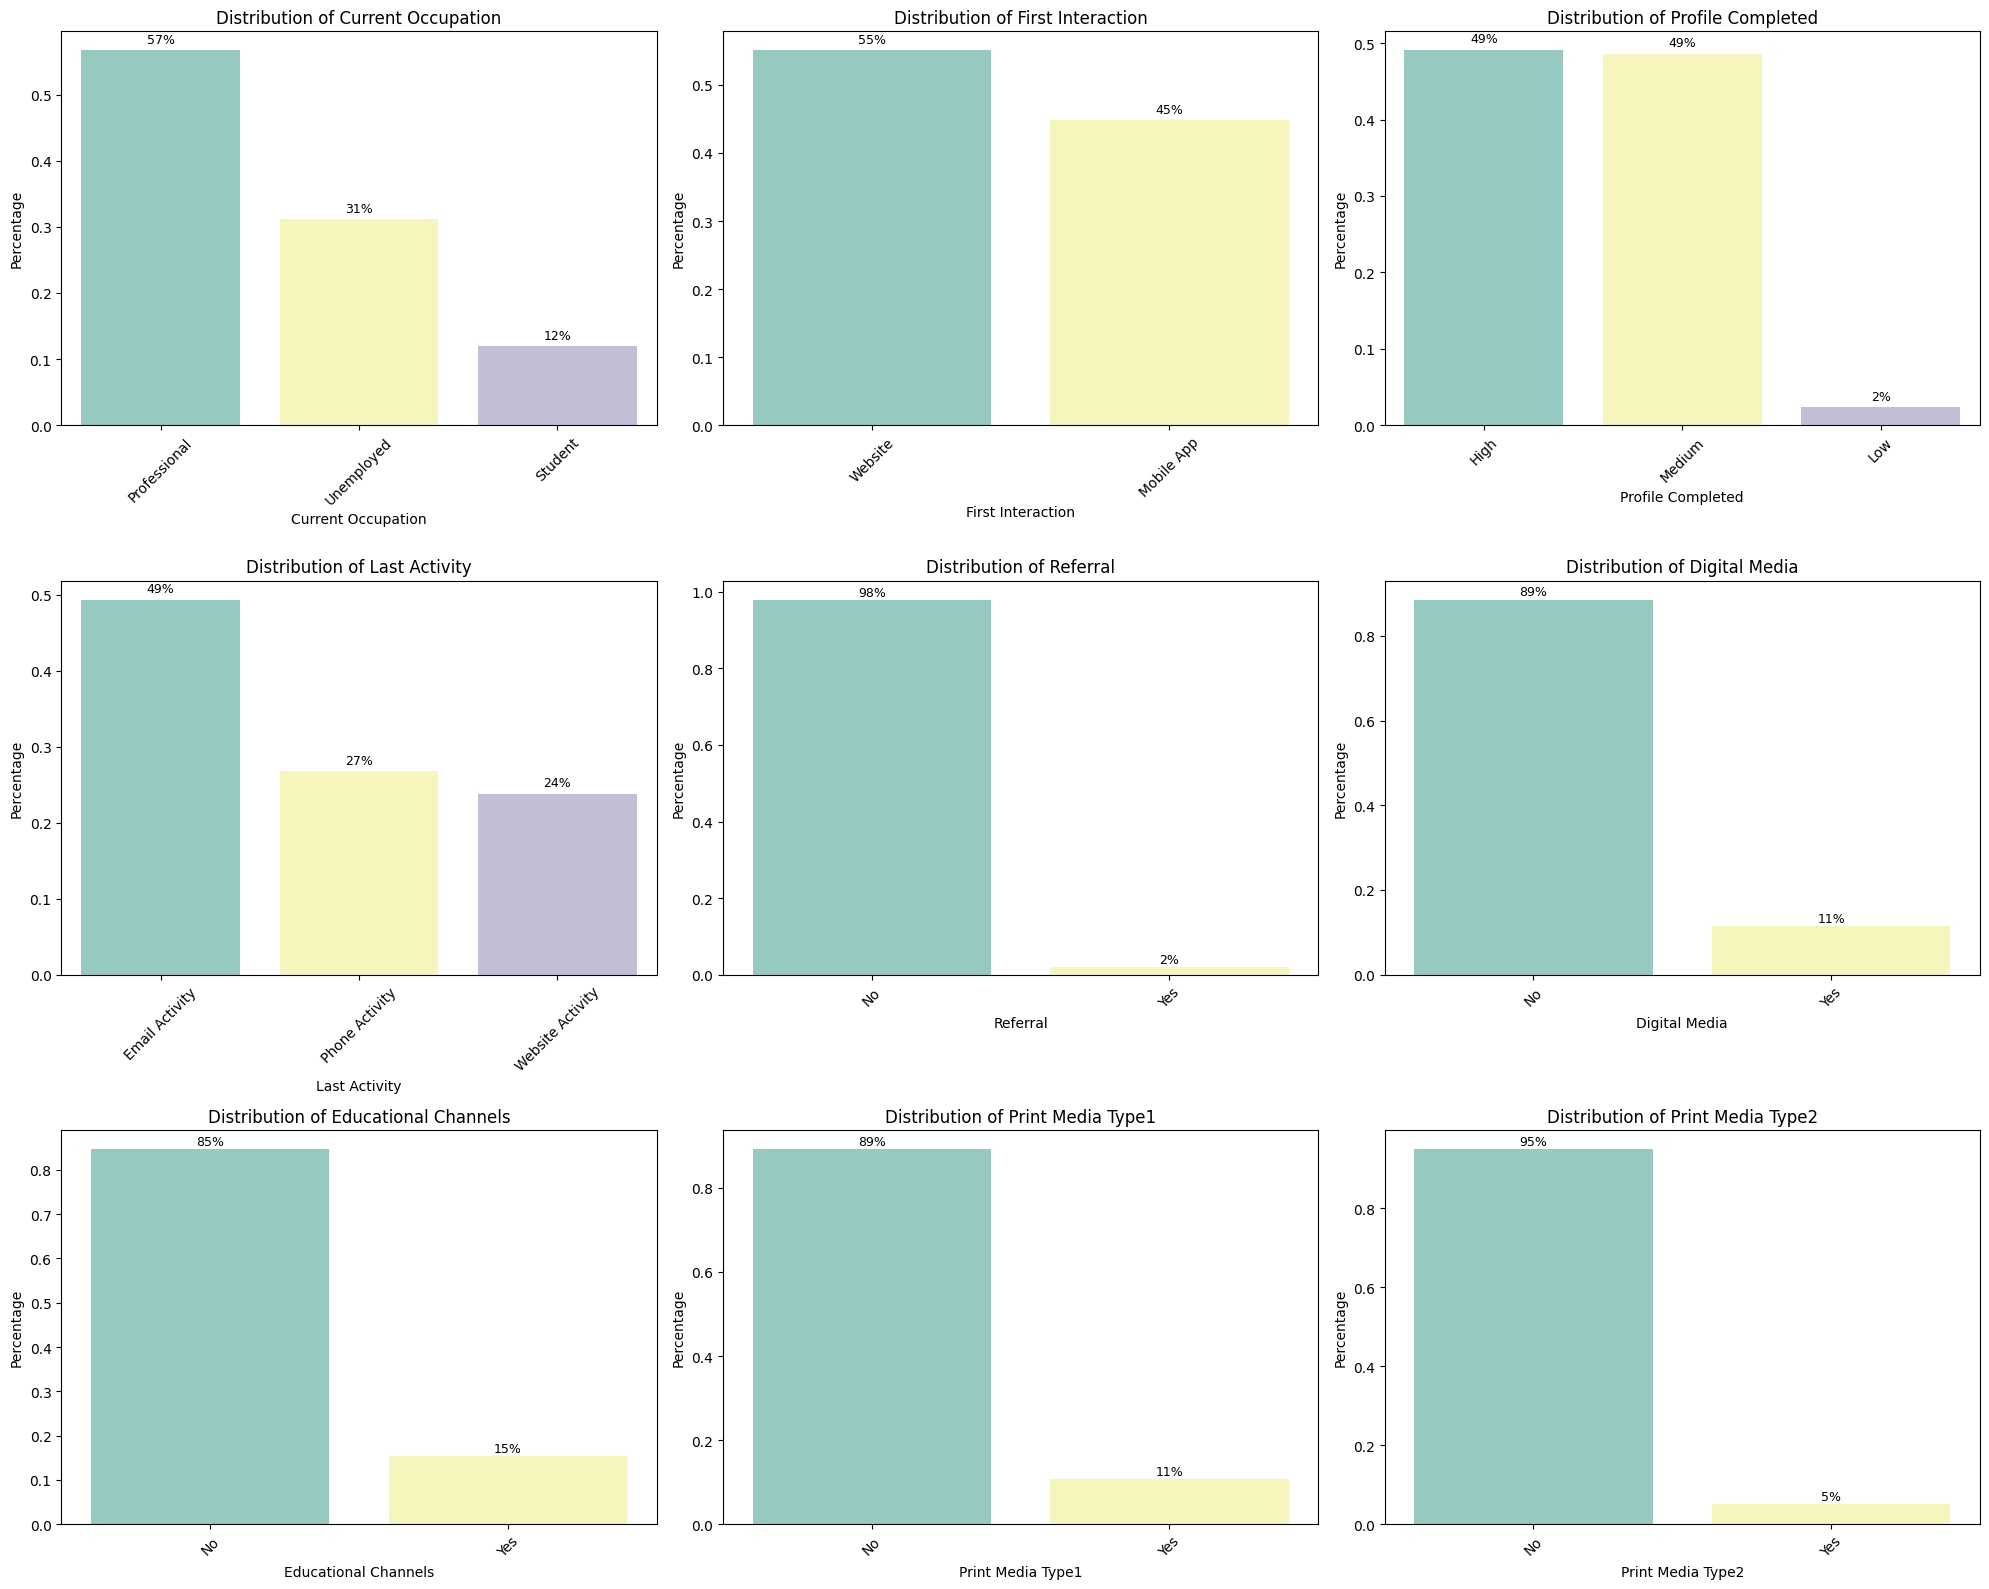

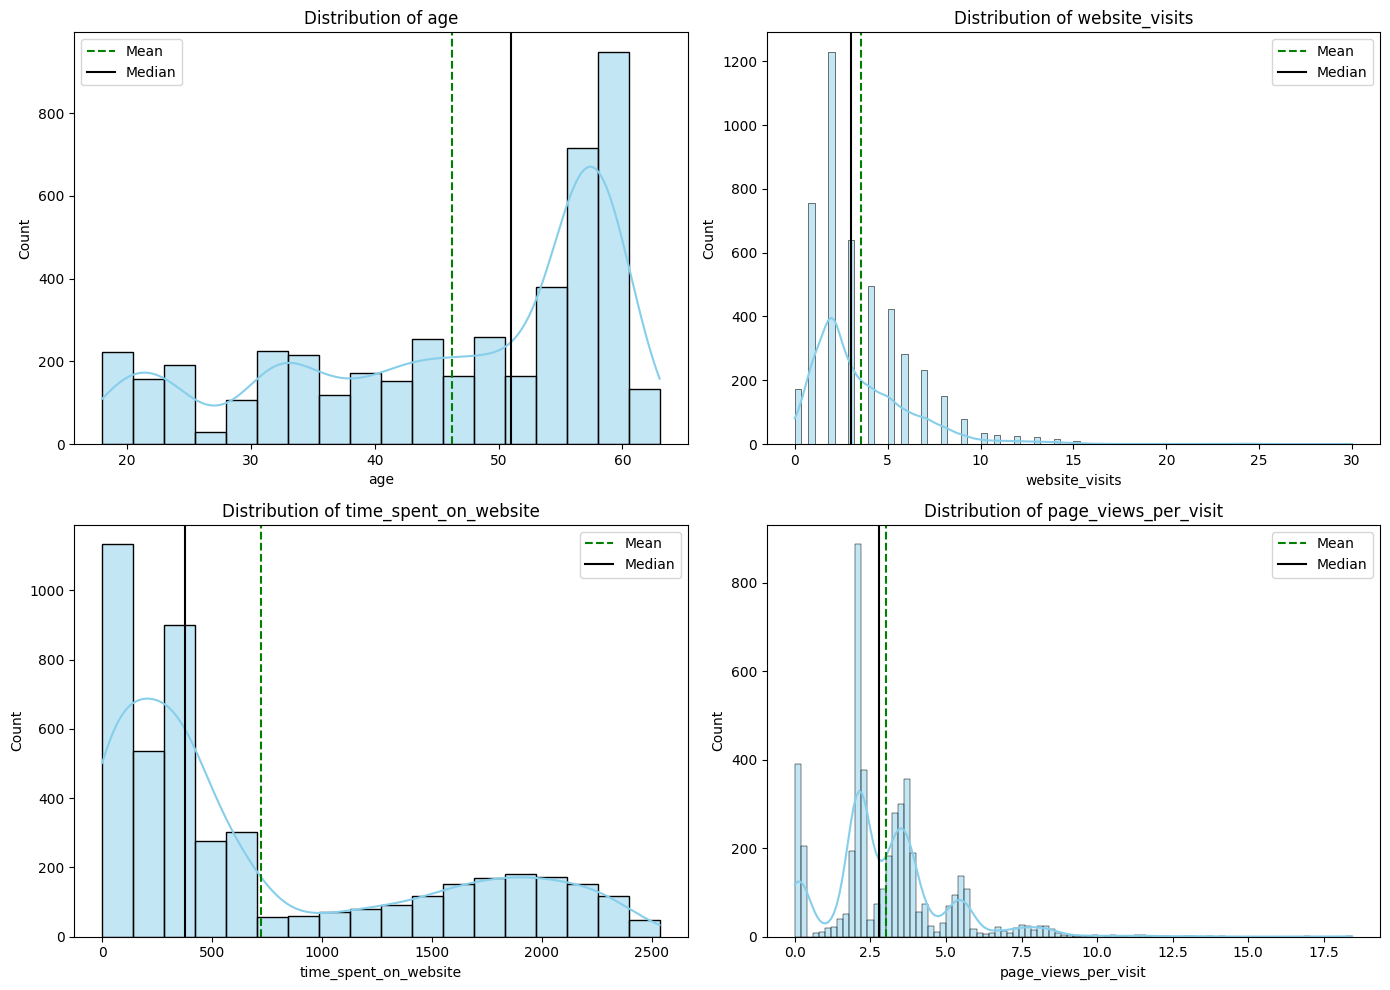

In [14]:
# EDA
# Univariate analysis: Conversion rate by each column

def univariate_analysis_plot(leads, categorical_col, target=None, ax=None, perc=False, show_conversion=False, palette='Set3'):
    """
    Plot the distribution (absolute counts or percentages) of a categorical variable.

    Parameters:
    - leads: pandas DataFrame containing the data
    - categorical_col: name of the categorical column to analyze
    - target: name of the binary target column (e.g., 'status'); only used if show_conversion=True
    - ax: optional matplotlib Axes object for plotting (useful for subplots)
    - perc: if True, show percentages instead of raw counts
    - show_conversion: if True, print the conversion rate for each category
    - palette: name of the seaborn color palette to use for the bar plot
    """
    # Plot the distribution of a categorical variable.
    # If show_conversion=True and a target is specified, also display the conversion rate for each category
    if show_conversion and target:
        conversion = leads.groupby(categorical_col)[target].mean().reset_index().sort_values(by=target, ascending=False)
        conversion.columns = [categorical_col, 'conversion_rate']
        print(f"\nConversion rate by '{categorical_col}':")
        display(conversion)

    # Simple distribution
    counts = leads[categorical_col].value_counts(normalize=perc).sort_values(ascending=False)
    plot_leads = counts.reset_index()
    plot_leads.columns = [categorical_col, 'value']

    if ax is None:
        plt.figure(figsize=(8, 5))
        ax = plt.gca()

    sns.barplot(data=plot_leads, x=categorical_col, y='value', ax=ax, palette=palette)
    ax.set_title(f'Distribution of {categorical_col.replace("_", " ").title()}')
    ax.set_ylabel('Percentage' if perc else 'Count')
    ax.set_xlabel(categorical_col.replace('_', ' ').title())
    ax.tick_params(axis='x', rotation=45)

    # Annotations above the bars
    for index, row in plot_leads.iterrows():
        offset = 0.01 if perc else (row.value * 0.05)
        label = f'{row.value:.0%}' if perc else int(row.value)
        ax.text(index, row.value + offset, label, ha='center', fontsize=9)

# List of categorical columns to visualize
cat_cols = [
    'current_occupation', 'first_interaction', 'profile_completed',
    'last_activity', 'referral', 'digital_media',
    'educational_channels', 'print_media_type1', 'print_media_type2'
]

# 3x3 categorical dashboard and print conversion rates
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    univariate_analysis_plot(leads, col, ax=axes[i], perc=True, target='status', show_conversion=True)

plt.tight_layout()
plt.savefig("categorical_univariate_dashboard.png", dpi=300)
plt.show()

# List of numerical variables
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=leads, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].axvline(leads[col].mean(), color='green', linestyle='--', label='Mean')
    axes[i].axvline(leads[col].median(), color='black', linestyle='-', label='Median')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.savefig("numerical_univariate_dashboard.png", dpi=300)
plt.show()


--- Bivariate Analysis: age vs status ---


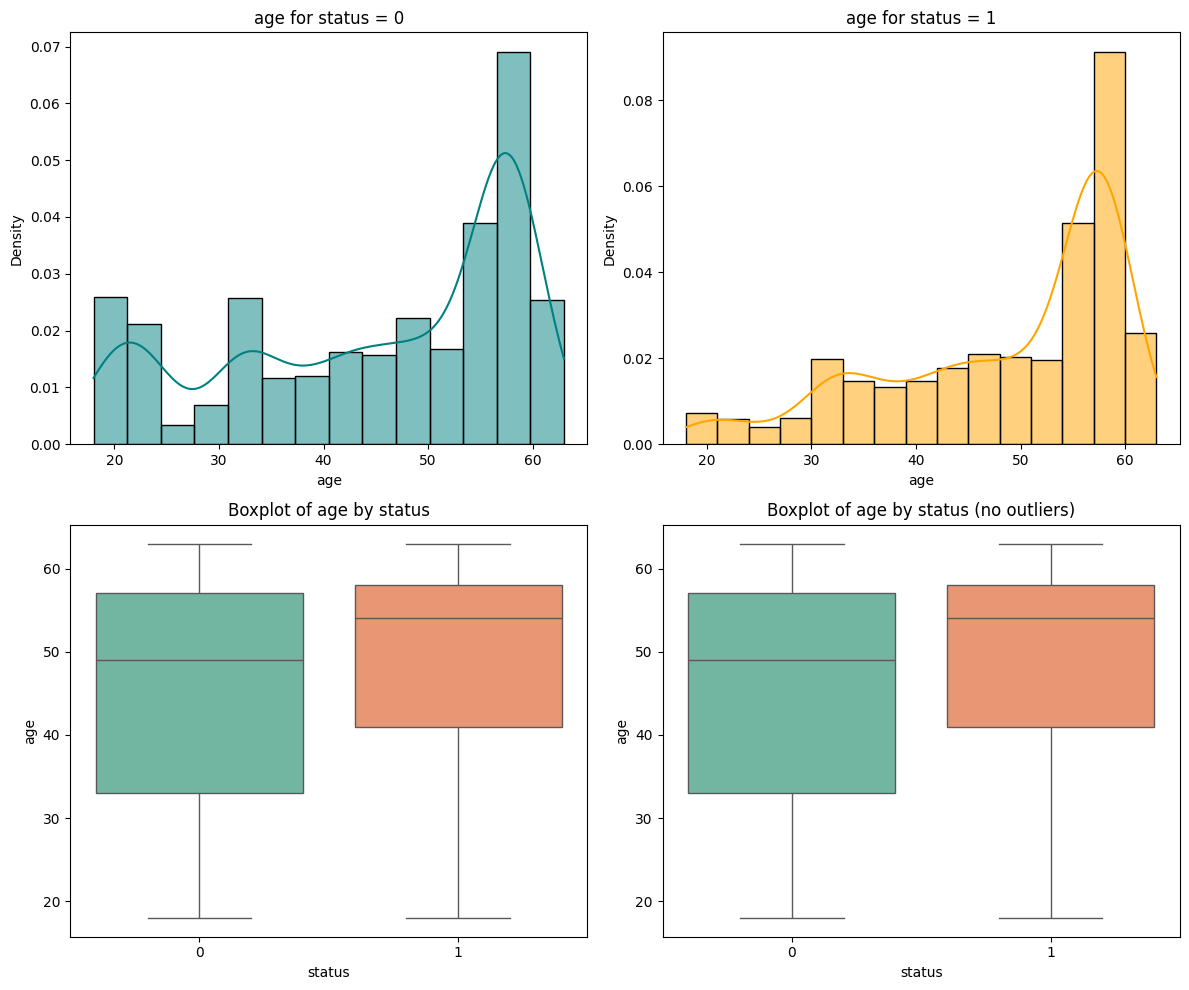


--- Bivariate Analysis: website_visits vs status ---


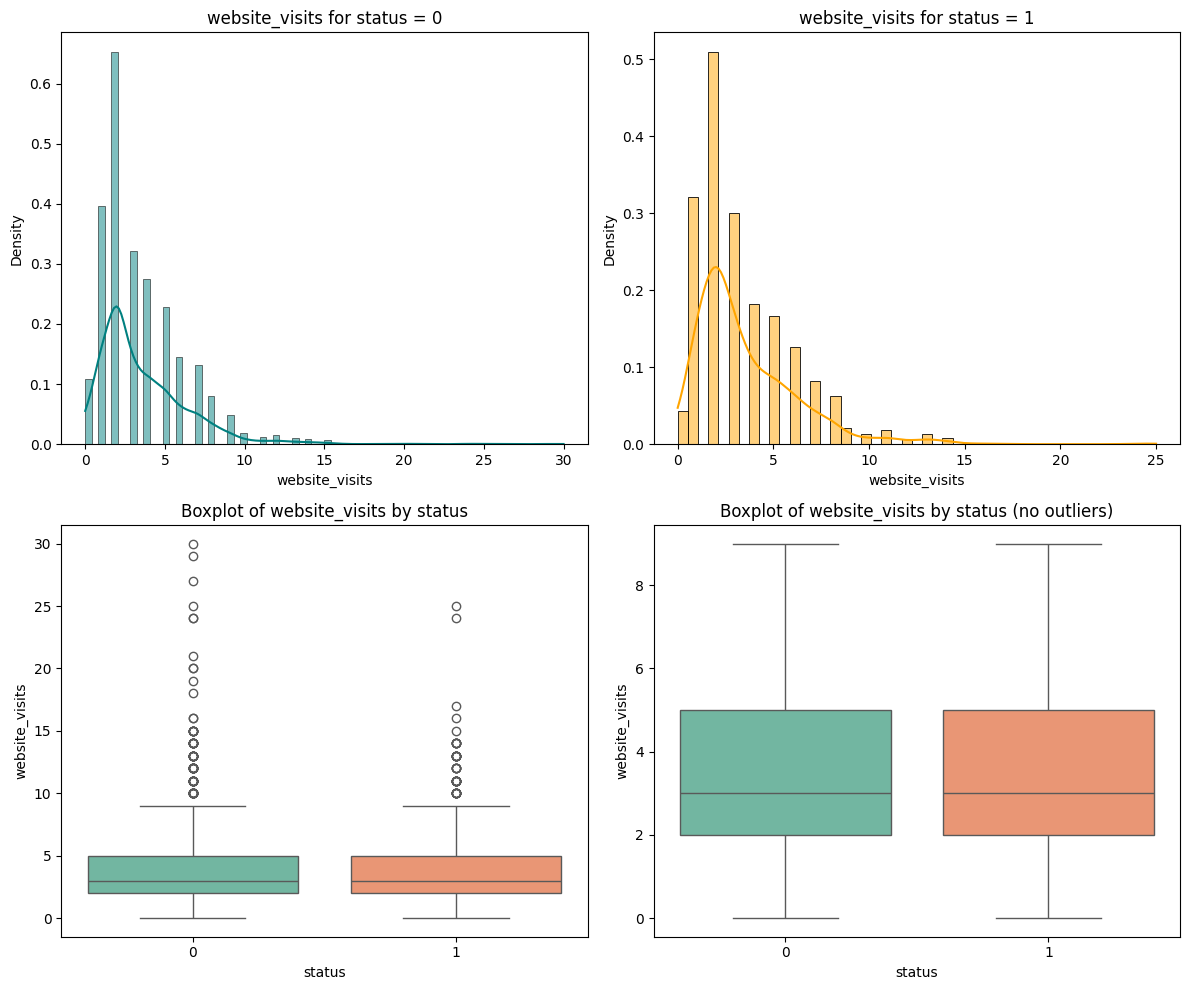


--- Bivariate Analysis: time_spent_on_website vs status ---


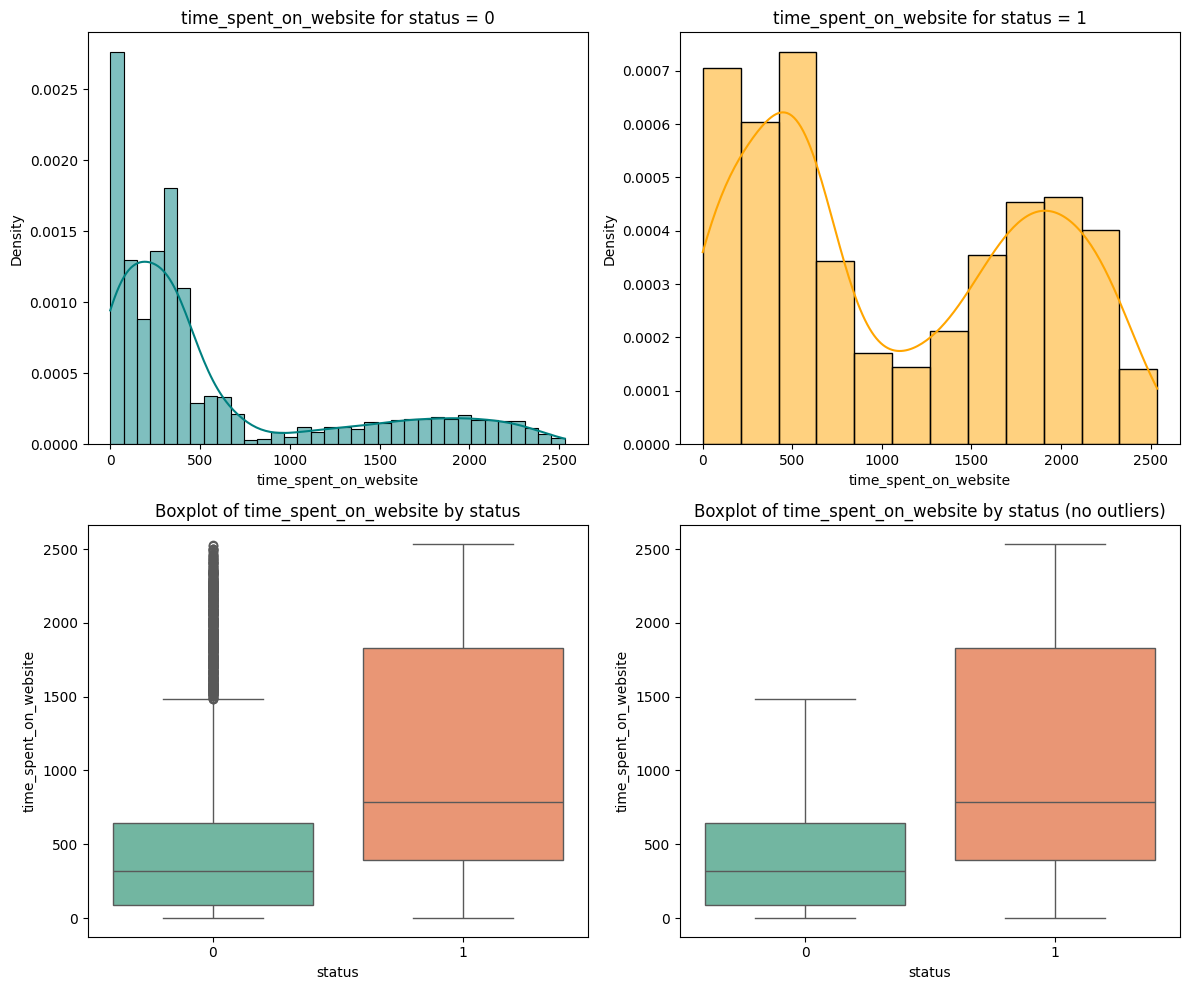


--- Bivariate Analysis: page_views_per_visit vs status ---


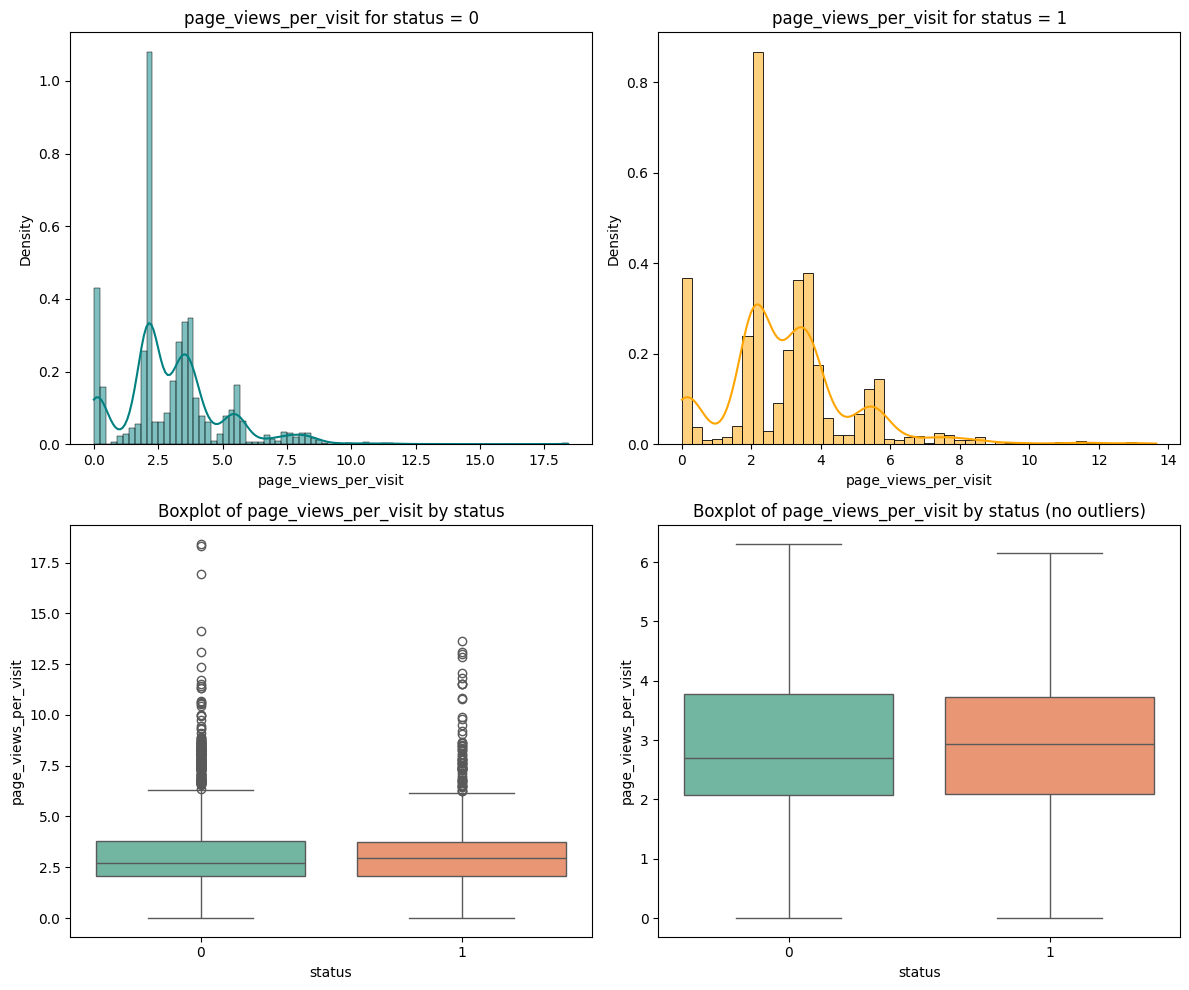

In [15]:
# EDA
# Bivariate distribution plot for numerical variables against the target
def bivariate_distribution_plot(leads, numerical_col, target='status'):
    """
    Plot distribution and boxplots of a numerical feature with respect to a binary target.
    Displays histograms and boxplots for each target class.
    """
    target_uniq = sorted(leads[target].unique())

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    for i, val in enumerate(target_uniq):
        sns.histplot(
            data=leads[leads[target] == val],
            x=numerical_col,
            kde=True,
            stat='density',
            ax=axs[0, i],
            color='teal' if i == 0 else 'orange'
        )
        axs[0, i].set_title(f"{numerical_col} for {target} = {val}")

    sns.boxplot(data=leads, x=target, y=numerical_col, ax=axs[1, 0], palette="Set2")
    axs[1, 0].set_title(f"Boxplot of {numerical_col} by {target}")

    sns.boxplot(data=leads, x=target, y=numerical_col, ax=axs[1, 1], showfliers=False, palette="Set2")
    axs[1, 1].set_title(f"Boxplot of {numerical_col} by {target} (no outliers)")

    plt.tight_layout()
    plt.show()

# All numerical variables
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
for col in num_cols:
    print(f"\n--- Bivariate Analysis: {col} vs status ---")
    bivariate_distribution_plot(leads, col)

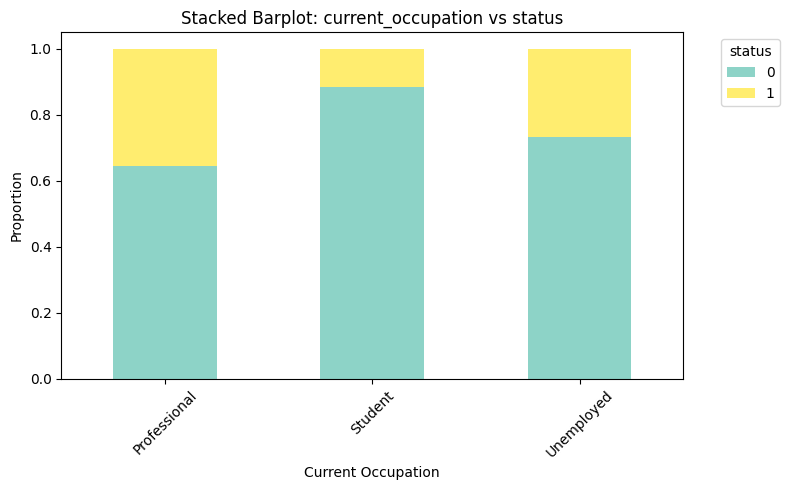

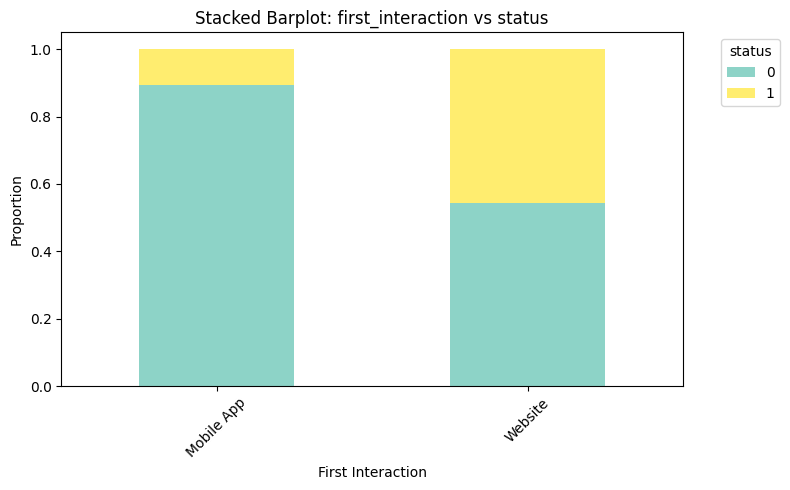

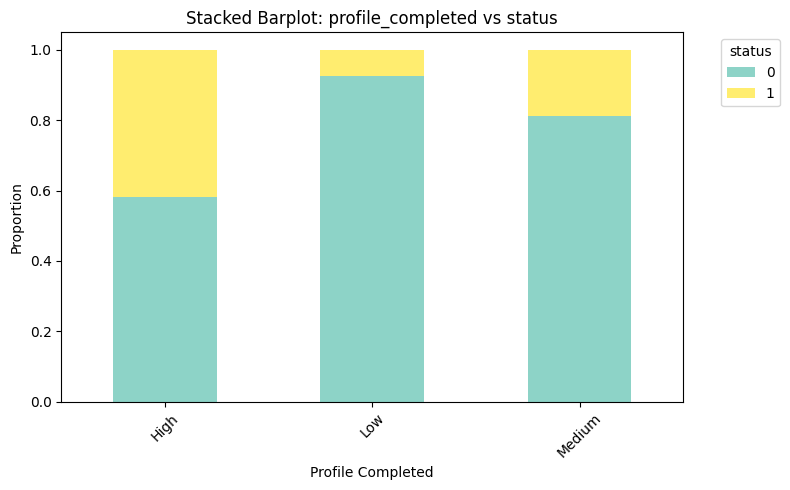

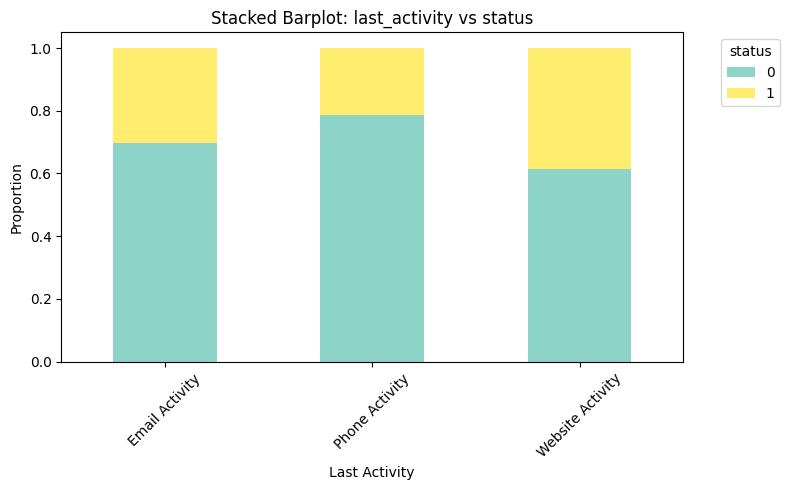

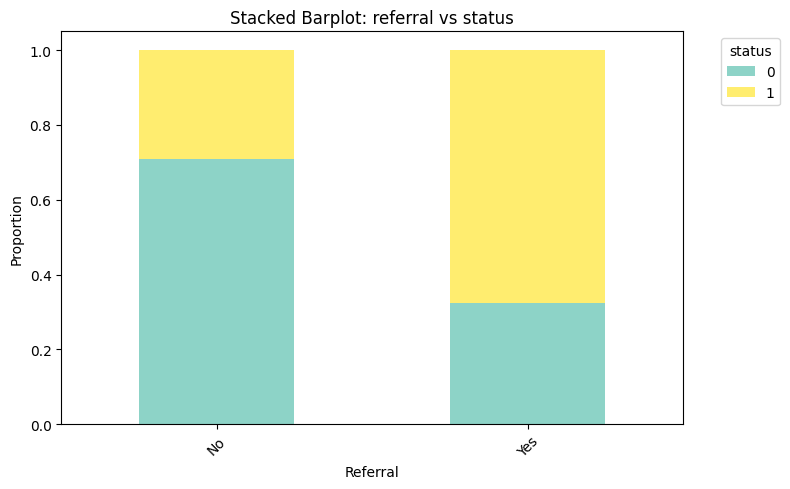

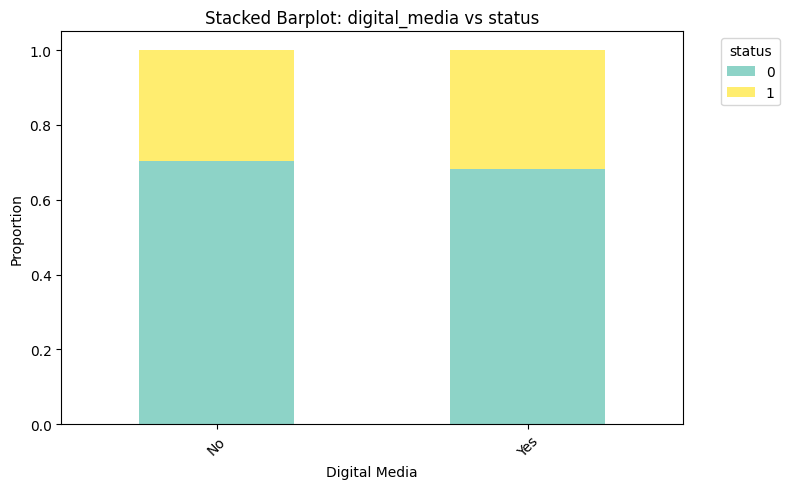

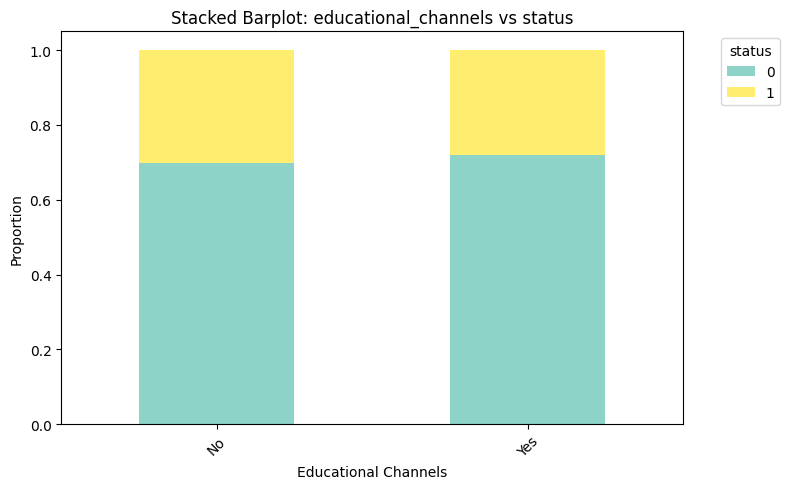

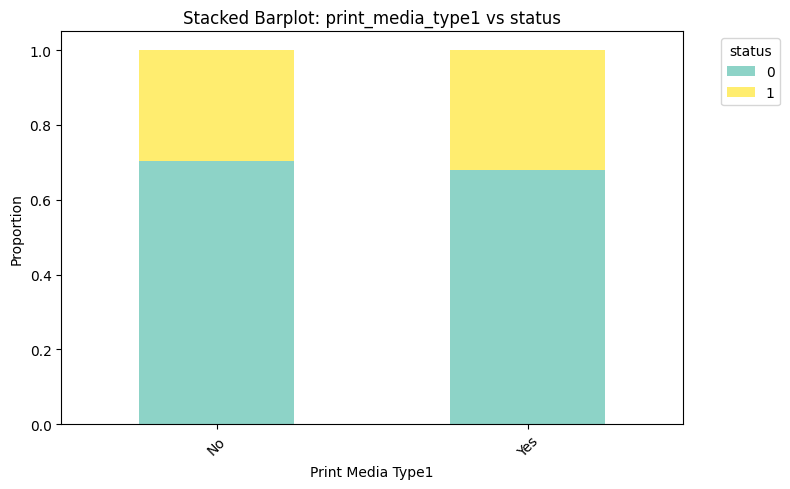

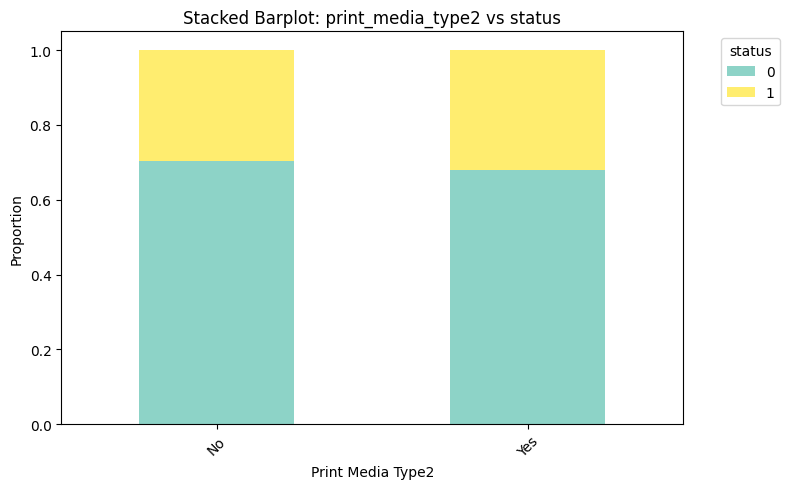

In [17]:
def bivariate_stacked_barplot(leads, categorical_col, target='status'):
    """
    Create a normalized stacked bar plot for a categorical feature against binary target.
    Show conversion proportion for each category.
    """
    crosstab = pd.crosstab(leads[categorical_col], leads[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set3')
    plt.title(f"Stacked Barplot: {categorical_col} vs {target}")
    plt.ylabel("Proportion")
    plt.xlabel(categorical_col.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Tutte le categoriche
cat_cols = [
    'current_occupation', 'first_interaction', 'profile_completed',
    'last_activity', 'referral', 'digital_media',
    'educational_channels', 'print_media_type1', 'print_media_type2'
]
for col in cat_cols:
    print(f"\n")
    bivariate_stacked_barplot(leads, col)

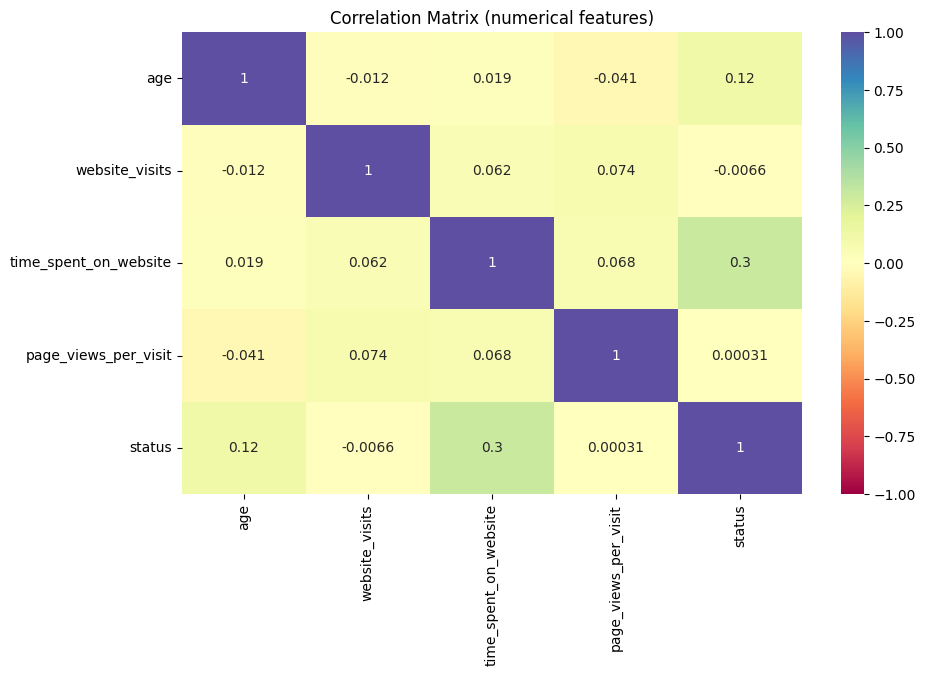

In [25]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(leads[num_cols + ['status']].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title("Correlation Matrix (numerical features)")
plt.show()

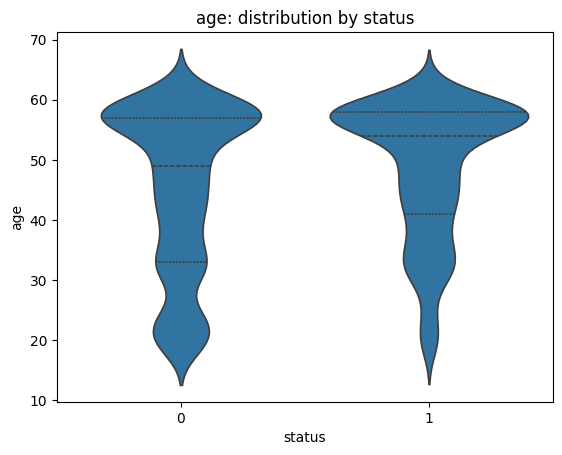

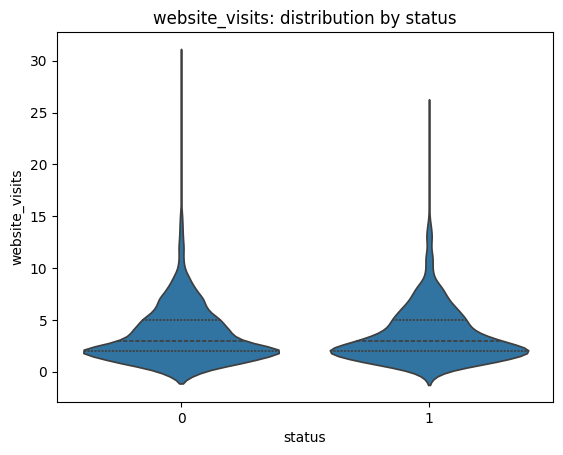

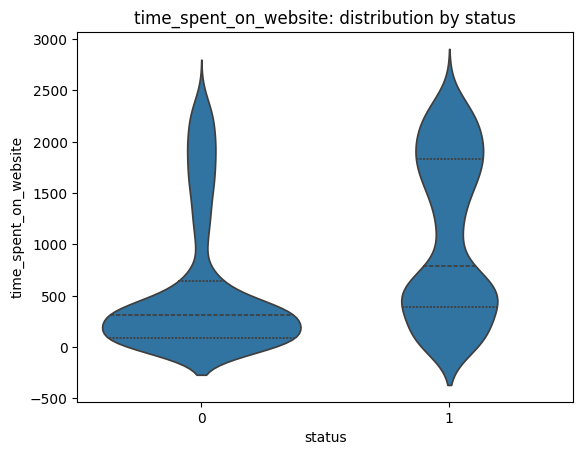

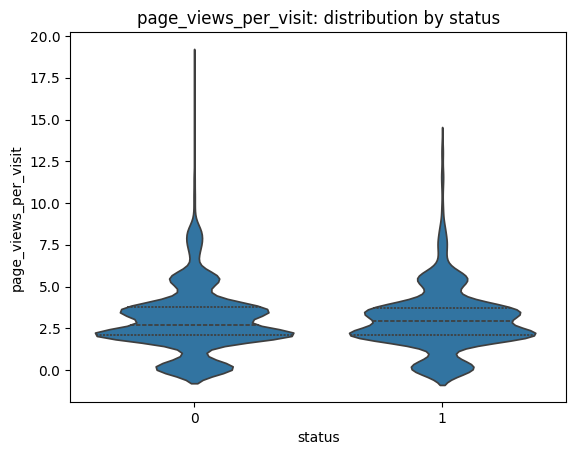

In [24]:
# Violin plots (numeric × target)
for col in num_cols:
    sns.violinplot(data=leads, x='status', y=col, inner='quartile')
    plt.title(f'{col}: distribution by status')
    plt.show()

**Observations from Univariate Plots**

•	`Categorical Variables Dashboard`: The bar plots provide a clear visual representation of class imbalances in a lot of categorical features. For example, `first_interaction` shows a strong dominance of a specific category (namely, “Website”), which may influence the model’s ability to generalize if not handled carefully.

•	`Profile Completion`: The distribution plot highlights a significant skew toward lower completion levels. This might reflect a general reluctance among users to provide extensive personal information, but also indicates a concrete opportunity for improving engagement strategies.

•	`Referral`: The plot shows that the majority of leads are not referrals, yet the conversion bar for referred users stands out prominently. This highlights a disproportionate effectiveness of referrals, even if they represent a smaller portion of the total lead base. Visually, this contrast underscores the strategic value of even a modest referral stream.

•	`Numerical Variables`: (1) `Age`, `website_visits`, and `page_views_per_visit` show right-skewed distributions, suggesting the presence of outliers. (2) `Time_spent_on_website` spans a wide range with a long tail, suggesting both high engagement and possible data entry issues. The clear distance between mean and median underlines this skewness.

**Observations from Bivariate Plots**

•	`Boxplots with and without outliers`: The inclusion of both raw and outlier-free boxplots is a strong design choice: it highlights how extreme values (especially for `time_spent_on_website` and `website_visits`) can distort interpretations of central tendency. Without outliers, the difference in medians between converted and non-converted leads becomes more apparent.

•	`Histograms by Status`: For variables like `page_views_per_visit`, the histograms show that converted leads tend to concentrate in the upper ranges, suggesting a positive relationship between browsing depth and conversion probability. These visual insights complement the numerical conversion rates and justify feature relevance.

•	`Violin Plots`: Violin plots enrich the analysis by showing not just the central values, but the density distribution within each status group. They reveal that, for instance, `age` and `website_visits` have broader variance among non-converted leads, indicating less consistency in this group’s behavior.

•	`Stacked Barplots`: These visualizations effectively illustrate conversion proportions within each category, especially for features with subtle numerical differences. For instance, even minor differences across print media types or educational channels are made visually salient, supporting a more granular assessment of impact.

•	`Heatmap of Correlations`: The correlation matrix confirms that no numerical variable is strongly correlated with the binary target, reinforcing the need for non-linear or ensemble models capable of capturing complex interactions.

**Answers**

**1. How does current occupation affect lead status?**

  •	Professionals have the highest conversion rate: approximately 35.5%.

  •	Students convert at a much lower rate: only 11.7%.

  •	Unemployed individuals fall in between, with a conversion rate of 26.6%.

`Conclusion`: Professionals represent the segment with the highest conversion potential.

**2. Does the first interaction channel impact lead status?**

  •	Leads who first interacted through the website have a 45.6% conversion rate.

  •	Those who came via the mobile app convert in only 10.5% of cases.

`Conclusion`: The website is clearly more effective than the mobile app as an initial touchpoint.

**3. Which interaction mode performs best?**

  •	Website activity: 38.5% conversion.

  •	Email activity: 30.3%.

  •	Phone activity: only 21.3%.

`Conclusion`: Web-based channels are the most effective, even in follow-up interactions.

**4. Which channels yield the highest conversion rates?**

  •	Referrals stand out by far, with a 67.7% conversion rate.

  •	Other channels (print media, digital media, educational channels) range between 27% and 32%, with minor differences.

`Conclusion`: Referrals are the most powerful conversion channel and should be prioritized.

**5. Does having a more complete profile increase the likelihood of conversion?**
  
  •	Leads with a highly complete profile convert 41.8% of the time.

  •	Leads with a moderately complete profile: 18.9%.

  •	Leads with a low-completion profile: only 7.5%.
  
`Conclusion`: Yes, the more detailed the lead’s profile, the higher the chances of conversion.

###Data Preprocessing
* Missing value treatment (see: `Data Overview`: `Sanity Checks` and `Data Preparation for modeling`)
* Feature engineering
* Outlier detection and treatment
* Preparing data for modeling.

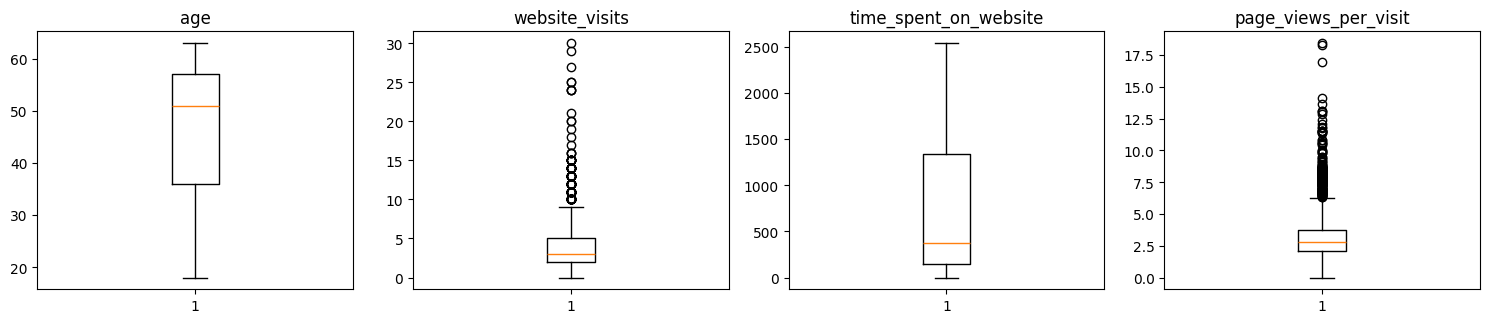

In [26]:
# Outlier detection
numeric_columns = leads.select_dtypes(include=np.number).columns.tolist()
if "status" in numeric_columns:
    numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(leads[variable], whis=1.5)
    plt.title(variable)

plt.tight_layout()
plt.show()

###Outlier Detection: Observations
Among the numerical features, `website_visits` and `page_views_per_visit` show visible outliers, while `age` and `time_spent_on_website` appear normally distributed without extreme values.

In [27]:
# Winsorise numeric tails at the 1st / 99th percentiles

numeric_columns = leads.select_dtypes(include='number').columns
leads_treated = leads.copy()

for col in numeric_columns:
    p01, p99 = leads[col].quantile([0.01, 0.99])
    leads_treated[col] = np.clip(leads[col], p01, p99)

print("Skew before ↔ after treatment")
display(
    pd.DataFrame({
        'before': leads[numeric_columns].skew(),
        'after' : leads_treated[numeric_columns].skew()
    }).round(2).T
)

Skew before ↔ after treatment


,age,website_visits,time_spent_on_website,page_views_per_visit,status
before,-0.72000,2.16000,0.95000,1.27000,0.88000
after,-0.72000,1.32000,0.95000,0.76000,0.88000


###Outlier Treatment: Observations
I winsorised each numeric column at the 1st and 99th percentiles, so basically I kept every record but capped extreme values at those cut‑offs. After capping, skew on the heavy tailed web‑activity fields dropped sharply (`website_visits` from 2.16 to 1.32; `page_views_per_visit` from 1.27 to 0.76), while variables like `age` were essentially unaffected, confirming they had no problematic tails. The full sample size is preserved, but the outliers that are most likely to cause problems no longer skew the statistics or cause the model to overfit.

In [28]:
# Data Preparation for modeling
# Encode binary 'Yes'/'No' columns to 1/0 and fill NaNs with 0
flag_cols = ['referral', 'digital_media', 'educational_channels',
             'print_media_type1', 'print_media_type2']
for col in flag_cols:
    leads_treated[col] = leads_treated[col].map({'Yes': 1, 'No': 0})
    leads_treated[col] = leads_treated[col].fillna(0)

# One-hot encode categorical variables with more than 2 categories
multi_cat_cols = ['current_occupation', 'first_interaction',
                  'profile_completed', 'last_activity']
leads_treated_encoded = pd.get_dummies(leads_treated, columns=multi_cat_cols, drop_first=True)

# Remove columns that have the same value for all observations
leads_treated_encoded = leads_treated_encoded.loc[:, leads_treated_encoded.nunique() > 1]

# Convert boolean columns to 1/0
bool_cols = leads_treated_encoded.select_dtypes(include='bool').columns
leads_treated_encoded[bool_cols] = leads_treated_encoded[bool_cols].astype(int)

# Format display of floats to show as integers (0 or 1)
pd.set_option('display.float_format', lambda x: f'{x:.0f}')

# Engineered feature: 'activity_types_count'
act_cols = [c for c in leads_treated_encoded.columns if c.startswith('last_activity_')]
leads_treated_encoded['activity_types_count'] = leads_treated_encoded[act_cols].sum(axis=1)

# Define X and y
X = leads_treated_encoded.drop(['status'], axis=1)
y = leads_treated_encoded['status']

# Stratified 70/30 split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [29]:
print("Train shape:", X_train.shape, " |  Test shape:", X_test.shape)
print("\nClass balance (train):")
print(y_train.value_counts(normalize=True).map('{:.1%}'.format))
print("\nClass balance (test):")
print(y_test.value_counts(normalize=True).map('{:.1%}'.format))

display(X_train.head())            # preview
X_train.info()                     # schema

print("\nMissing values :", X_train.isna().sum().sum())
print("Duplicate rows  :", X_train.duplicated().sum())

Train shape: (3228, 17)  |  Test shape: (1384, 17)

Class balance (train):
status
0    70.1%
1    29.9%
Name: proportion, dtype: object

Class balance (test):
status
0    70.2%
1    29.8%
Name: proportion, dtype: object


,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,activity_types_count
1996,53,5,457,2,0,0,0,1,0,0,1,1,0,0,0,1,1
1015,18,6,359,6,0,0,0,1,0,1,0,1,0,0,1,0,1
3294,51,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4116,59,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1695,24,1,578,2,0,0,1,0,0,1,0,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 3228 entries, 1996 to 3282
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3228 non-null   float64
 1   website_visits                  3228 non-null   int64  
 2   time_spent_on_website           3228 non-null   float64
 3   page_views_per_visit            3228 non-null   float64
 4   print_media_type1               3228 non-null   int64  
 5   print_media_type2               3228 non-null   int64  
 6   digital_media                   3228 non-null   int64  
 7   educational_channels            3228 non-null   int64  
 8   referral                        3228 non-null   int64  
 9   current_occupation_Student      3228 non-null   int64  
 10  current_occupation_Unemployed   3228 non-null   int64  
 11  first_interaction_Website       3228 non-null   int64  
 12  profile_completed_Low           3228

##EDA

- It is a good idea to explore the data once again after manipulating it.

Preview of training data:


,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,activity_types_count
1996,53,5,457,2,0,0,0,1,0,0,1,1,0,0,0,1,1
1015,18,6,359,6,0,0,0,1,0,1,0,1,0,0,1,0,1
3294,51,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4116,59,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1695,24,1,578,2,0,0,1,0,0,1,0,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 3228 entries, 1996 to 3282
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3228 non-null   float64
 1   website_visits                  3228 non-null   int64  
 2   time_spent_on_website           3228 non-null   float64
 3   page_views_per_visit            3228 non-null   float64
 4   print_media_type1               3228 non-null   int64  
 5   print_media_type2               3228 non-null   int64  
 6   digital_media                   3228 non-null   int64  
 7   educational_channels            3228 non-null   int64  
 8   referral                        3228 non-null   int64  
 9   current_occupation_Student      3228 non-null   int64  
 10  current_occupation_Unemployed   3228 non-null   int64  
 11  first_interaction_Website       3228 non-null   int64  
 12  profile_completed_Low           3228

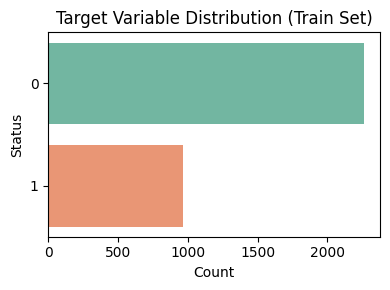

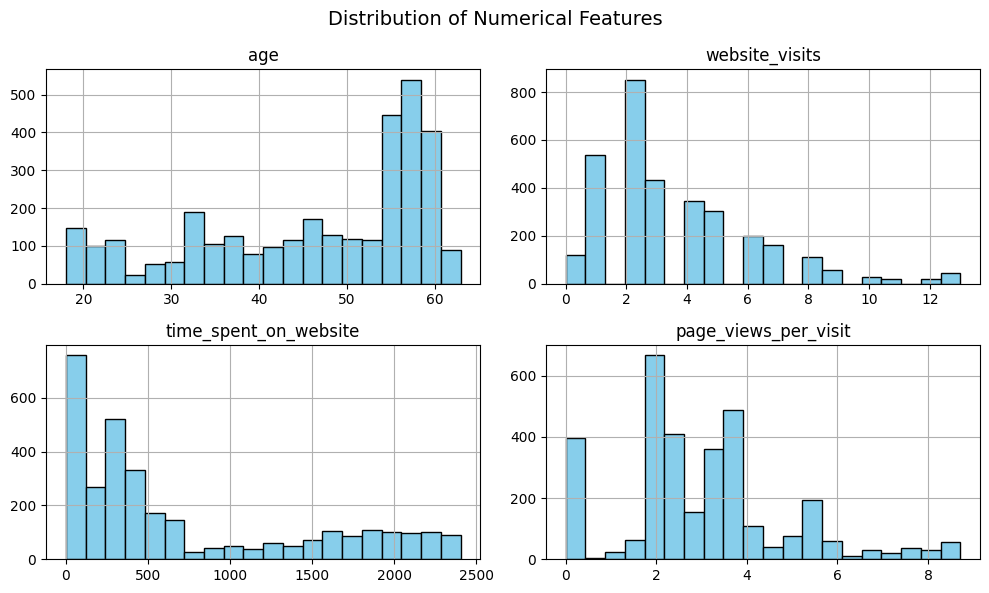

In [30]:
# Post-Preprocessing Data Check

print("Preview of training data:")
display(X_train.head())
X_train.info()

# Check for missing values
print("\nMissing values in X_train:")
print(X_train.isnull().sum().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows in X_train:")
print(X_train.duplicated().sum())

# Distribution of the target variable
plt.figure(figsize=(4, 3))
sns.countplot(y=y_train, palette="Set2")
plt.title('Target Variable Distribution (Train Set)')
plt.xlabel('Count')
plt.ylabel('Status')
plt.tight_layout()
plt.show()

# Histograms of numerical features
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
X_train[num_cols].hist(bins=20, figsize=(10, 6), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
# Removes duplicates in both X_train and y_train
duplicated_rows = X_train.duplicated()
X_train = X_train[~duplicated_rows]
y_train = y_train[~duplicated_rows]

**Observations**: With the `Post-Preprocessing Data Check`, I find that the dataset has 17 columns: this is because the `ID` column was removed, the categorical variables were transformed by one-hot encoding with `drop_first=True`, and I feature-engineered: `activity_types_count`, which is a proxy for engagement that counts how many different activity channels a lead has used.

In addition, 6 duplicate rows were detected in the training set. Since these were identical observations, they were removed from `X_train` and `y_train` to avoid redundancy and ensure the quality of the modeling process.

## Building a Decision Tree model

In [32]:
# Define the evaluation helper
def metrics_score(actual, predicted):
    """
    Print classification metrics and plot a confusion matrix.

    actual: array-like of true labels
    predicted: array-like of predicted labels
    """
    # Classification report
    print(classification_report(actual, predicted))

    # Confusion matrix heatmap
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        xticklabels=['Not Converted', 'Converted'],
        yticklabels=['Not Converted', 'Converted']
    )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

Base Decision Tree - Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2259
           1       1.00      1.00      1.00       963

    accuracy                           1.00      3222
   macro avg       1.00      1.00      1.00      3222
weighted avg       1.00      1.00      1.00      3222



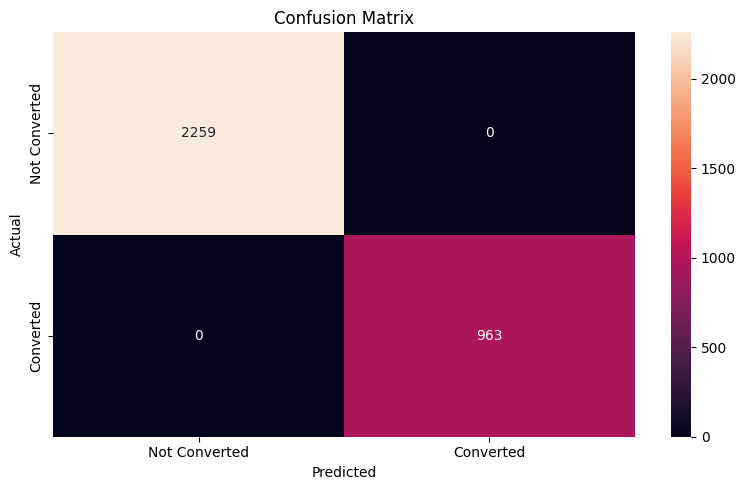


Base Decision Tree - Test Set
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       971
           1       0.64      0.70      0.67       413

    accuracy                           0.80      1384
   macro avg       0.76      0.77      0.76      1384
weighted avg       0.80      0.80      0.80      1384



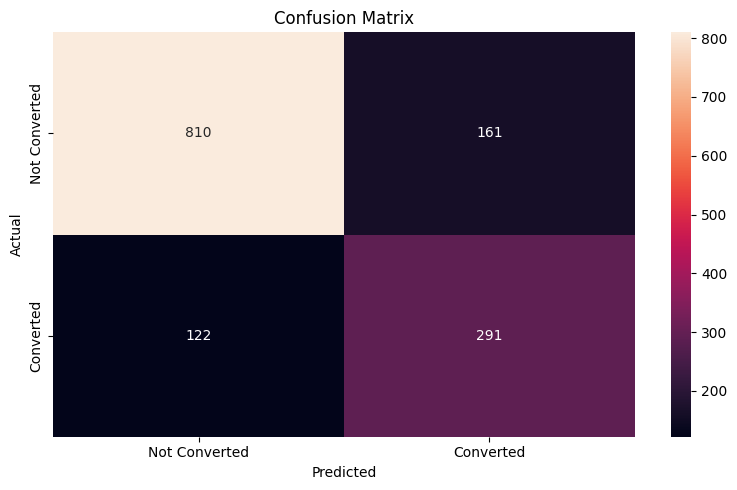

In [33]:
# Fit base Decision Tree and evaluate
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Make predictions
y_train_pred = d_tree.predict(X_train)
y_test_pred  = d_tree.predict(X_test)

# Evaluate
print("Base Decision Tree - Training Set")
metrics_score(y_train, y_train_pred)

print("\nBase Decision Tree - Test Set")
metrics_score(y_test, y_test_pred)

The baseline model with Decision Tree achieves 100% accuracy on the training set, indicating clear overfitting as it perfectly classifies all the data seen in training. However, performance on the test set drops significantly: accuracy drops to 80%, with recall of 70% and precision of 64% for the class of converted leads. This gap between training and testing indicates that the model is storing data rather than generalizing, necessitating the use of hyperparameter regularization.

In [34]:
# Define the base Decision Tree with class weights
d_tree_tuned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})

# Specify the hyperparameter grid
parameters = {
    'max_depth': range(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25]
}

# Use recall for the positive class as the scoring metric
scorer = make_scorer(recall_score, pos_label=1)

# Perform 5-fold cross-validated grid search
grid = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid.fit(X_train, y_train)

# Extract and retrain the best estimator
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

I optimize for **recall** because missing a potential converted lead (namely, a false negative) is more costly to the business than a false positive.

Tuned Decision Tree - Performance on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2259
           1       0.60      0.90      0.72       963

    accuracy                           0.79      3222
   macro avg       0.77      0.82      0.78      3222
weighted avg       0.84      0.79      0.80      3222



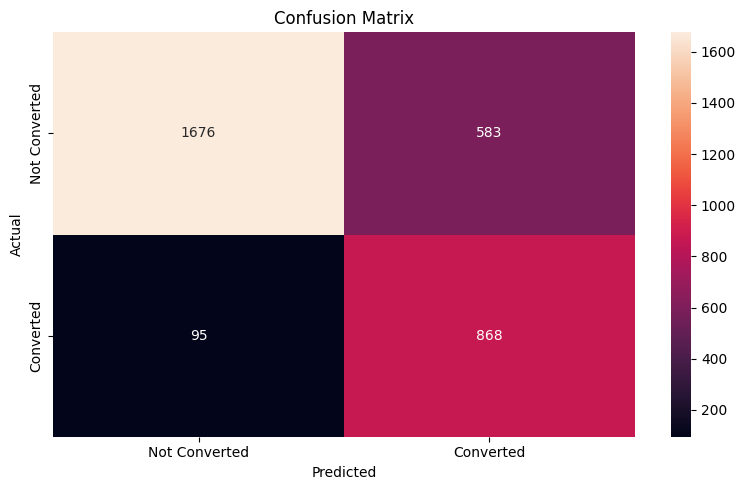


Tuned Decision Tree - Performance on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.90      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



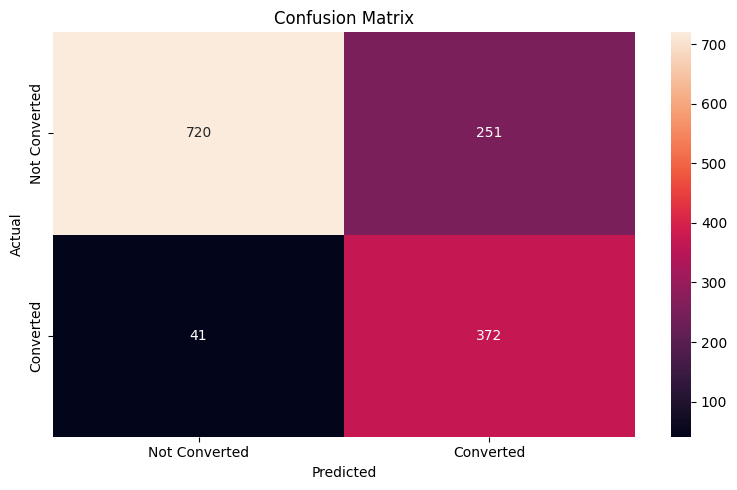

In [53]:
# Make predictions using the tuned Decision Tree
y_train_pred_tuned = best_tree.predict(X_train)
y_test_pred_tuned = best_tree.predict(X_test)

# Evaluate performance on the training set
print("Tuned Decision Tree - Performance on Training Set:")
metrics_score(y_train, y_train_pred_tuned)

# Evaluate performance on the test set
print("\nTuned Decision Tree - Performance on Test Set:")
metrics_score(y_test, y_test_pred_tuned)

After defining the hyperparameters (`max_depth=3, min_samples_leaf=5, and class_weight={0: 0.3, 1: 0.7}`), the Decision Tree model improves generalization compared to the base model. Accuracy on the training set is reduced to 79%, indicating that overfitting has been mitigated. On the test set, the accuracy remains stable (79%), but there is a significant improvement in the recall of the positive class (namely the converted ones), which increases from 0.70 to 0.90. This means that the model is now much better at identifying leads that have converted, at the expense of a slight increase in false positives. Overall, the calibration of the hyperparameters has resulted in a more balanced and business-oriented model.

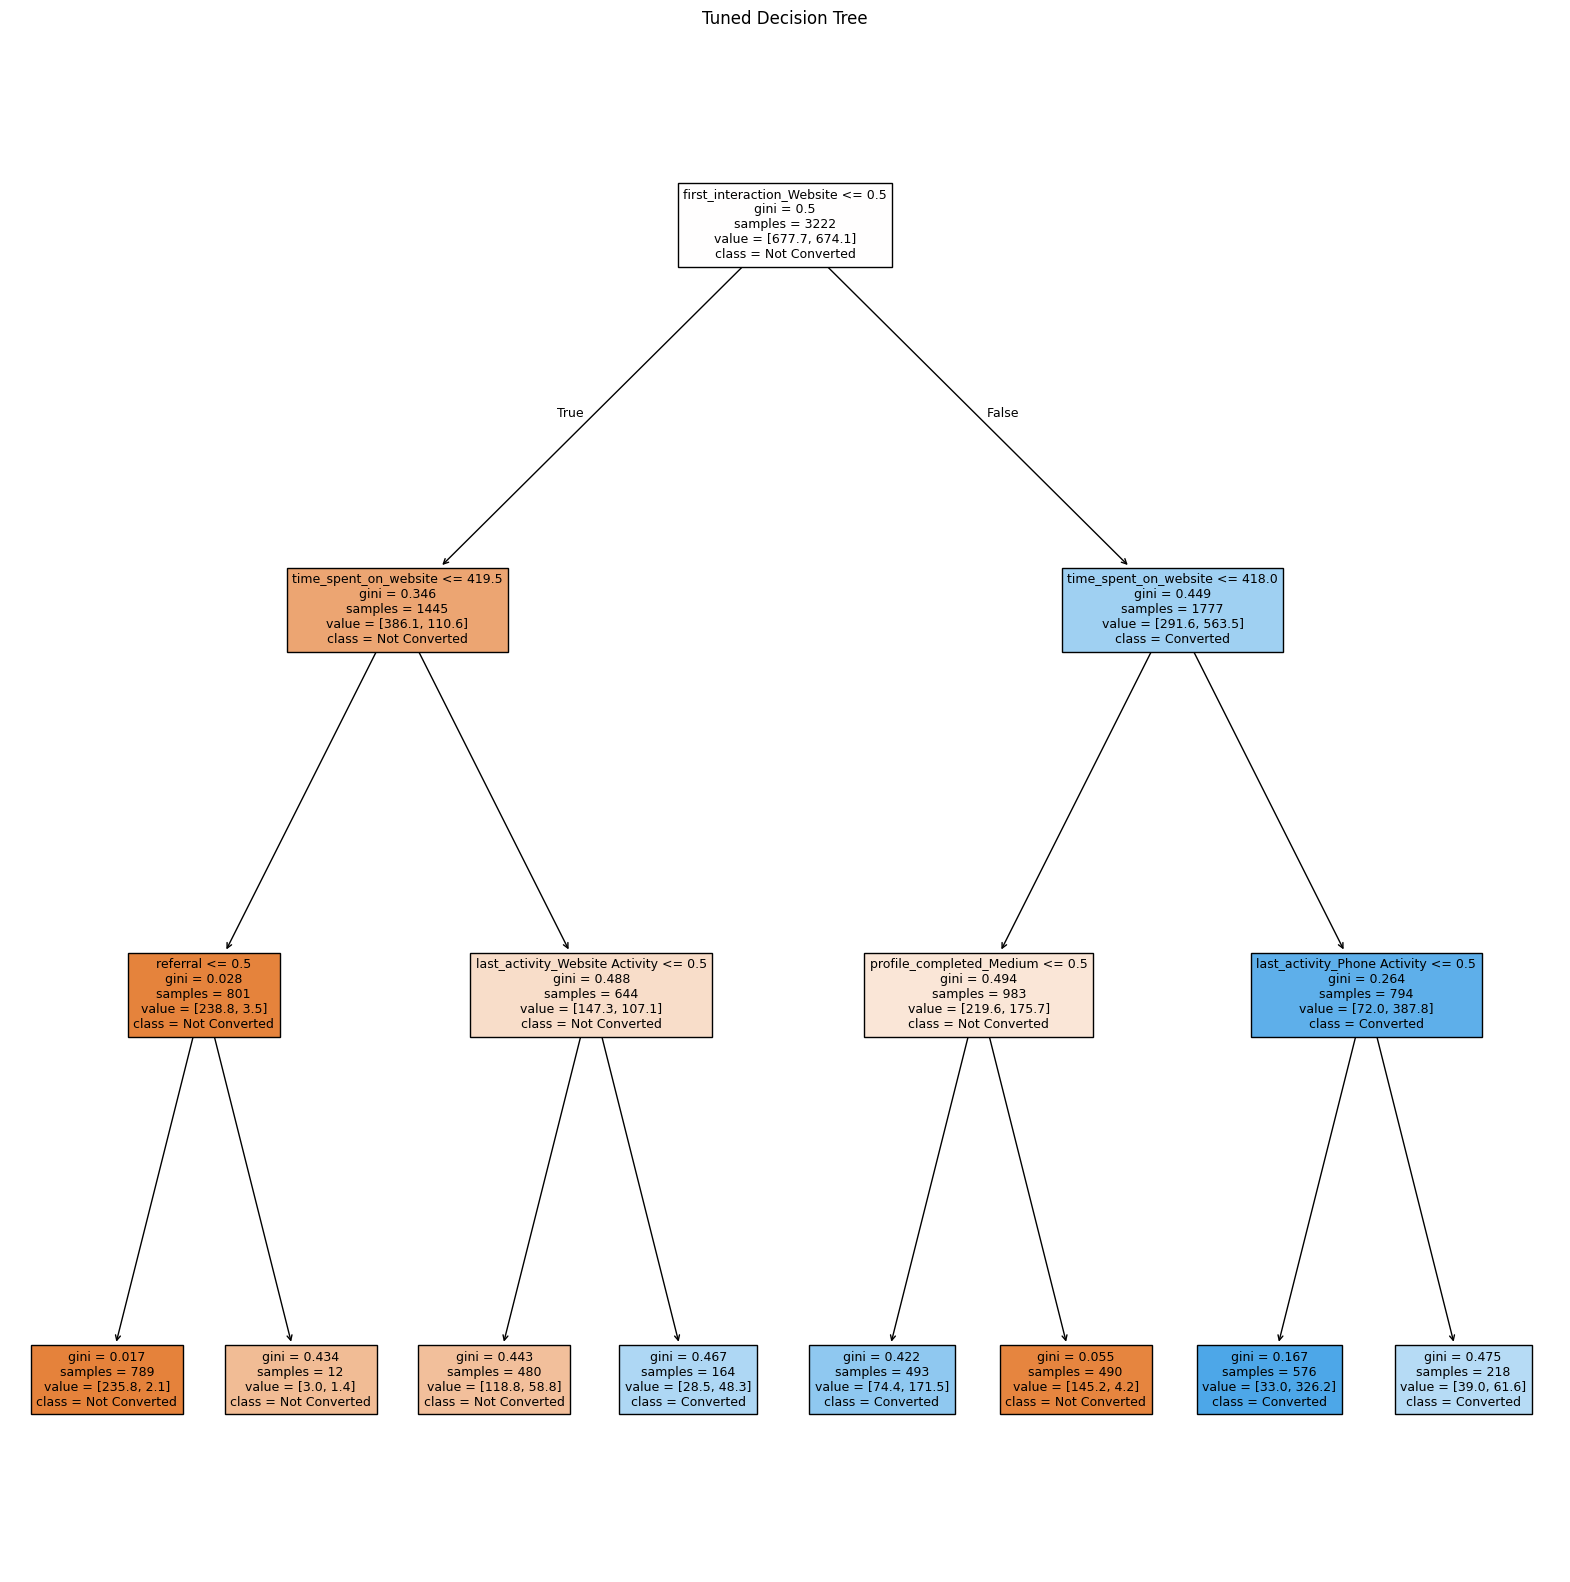

In [36]:
# Visualize the tuned Decision Tree structure for interpretability
plt.figure(figsize=(20, 20))
tree.plot_tree(best_tree,
               feature_names=X_train.columns, # Label nodes
               filled=True,                   # Color nodes
               fontsize=9,
               class_names=["Not Converted", "Converted"])
plt.title("Tuned Decision Tree")
plt.show()

The visualization of the decision tree confirms the importance of some key variables in determining the likelihood of conversion. In particular, first interaction via website (`first_interaction_Website`) and time spent on the site (`time_spent_on_website`) are the first discriminating factors at the root of the tree. Moving through the nodes, I highlight the role of variables such as `referral`, `last_activity`, and `profile_completed_Medium`, which show a clear distinction between converted and non-converted leads. The structure of the tree thus reflects the findings of the EDA, making the model's decision-making process interpretable and providing useful insights for marketing strategies.

,Feature,Importance
11,first_interaction_Website,0.356
2,time_spent_on_website,0.324
13,profile_completed_Medium,0.248
14,last_activity_Phone Activity,0.041
15,last_activity_Website Activity,0.028
8,referral,0.002
0,age,0.000
3,page_views_per_visit,0.000
1,website_visits,0.000
7,educational_channels,0.000


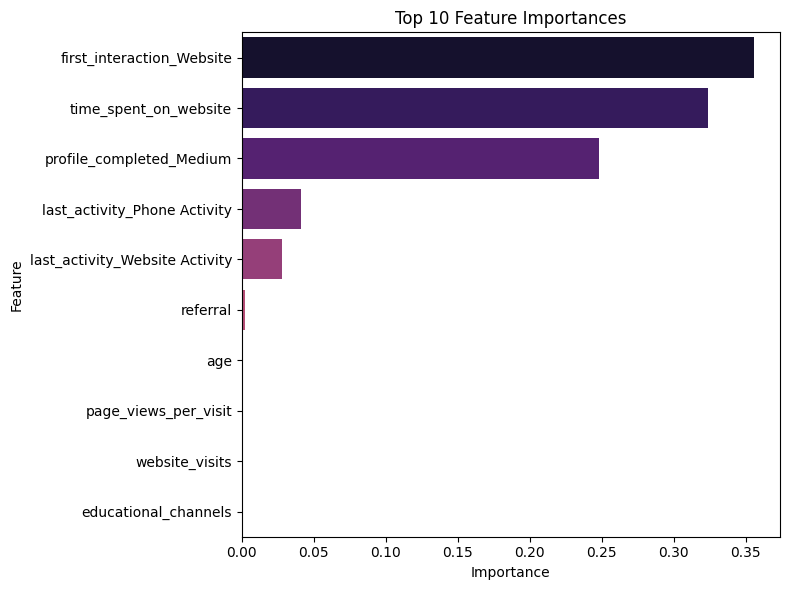

In [37]:
# Refit the best estimator from GridSearch
best_tree.fit(X_train, y_train)

# Extract feature importances from the tuned tree
importances = best_tree.feature_importances_

# Create a DataFrame mapping feature names to their importance scores (descending)
feat_imp = (
    pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
      .sort_values('Importance', ascending=False)
)

# Reset float formatting to show decimals
pd.reset_option('display.float_format')
feat_imp['Importance'] = feat_imp['Importance'].round(3)

# Display the feature importance table
display(feat_imp)

# Plot the top 10 features for visual confirmation
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='magma')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

The feature importance graph confirms and quantifies the importance of the variables that appeared in the main nodes of the decision tree. The two most important features are `first_interaction_Website` and `time_spent_on_website`, which alone explain most of the model's decisions. These are followed by `profile_completed_medium` and the user's last activities (`last_activity_phone` activity and `last_activity_website` activity). In contrast, variables such as `age`, `website_visits`, `digital_media`, and `educational_channels` have negligible weight. This analysis reinforces the idea that initial user behavior and time on site are strong predictors of conversion.

Tuned Decision Tree – Test Set Performance
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.90      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



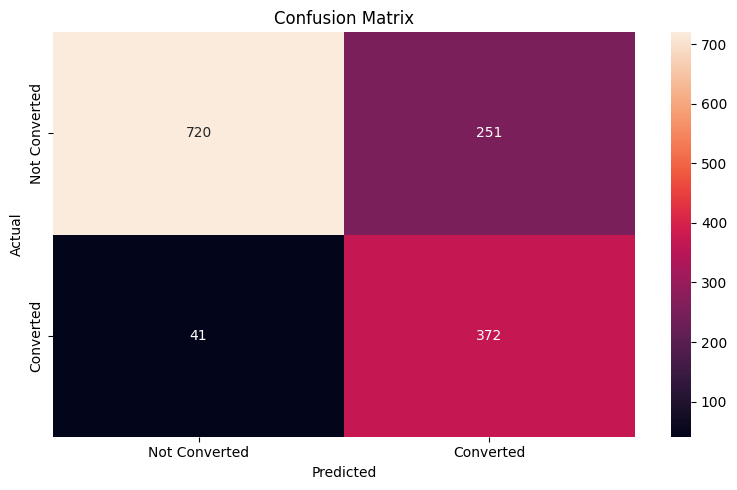

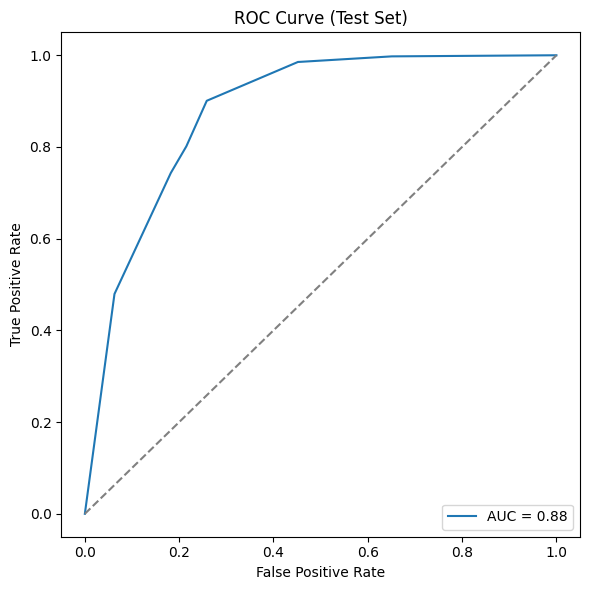

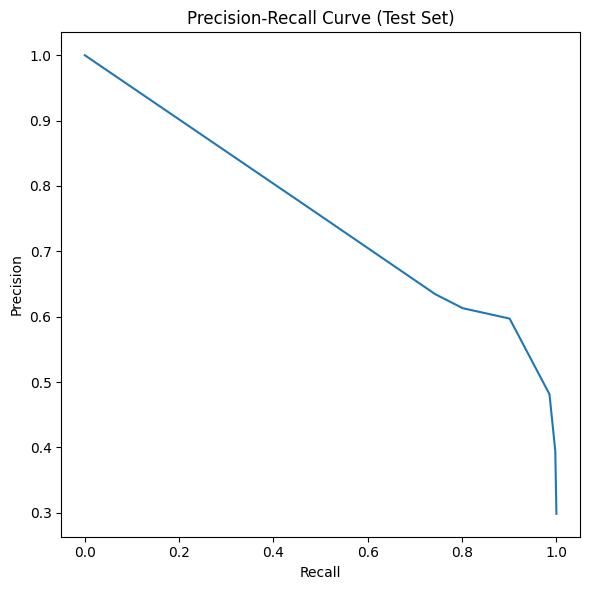

In [38]:
# Review Model Performance

# Print confusion matrix and classification report on the test set
print("Tuned Decision Tree – Test Set Performance")
metrics_score(y_test, y_test_pred_tuned)

# Compute and plot the ROC curve along with AUC
from sklearn.metrics import roc_curve, auc

y_proba = best_tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')          # Diagonal line
plt.title('ROC Curve (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Compute and plot the Precision-Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve (Test Set)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()

Checking the performance of the model confirms the goodness of the optimization choices. The confusion matrix shows a good balance between classes: out of 413 actually converted leads, the model correctly identifies 372, with only 41 false negatives. The value of AUC = 0.88 obtained from the ROC curve indicates an excellent discriminative ability of the model. The Precision-Recall curve also confirms the robustness of the behavior in the presence of unbalanced classes, maintaining acceptable levels of accuracy even with high recall. Overall, the model shows a good ability to identify promising leads without unduly sacrificing precision.

## Do we need to prune the tree?

Best ccp_alpha: 0.0016
Pruned depth: 8  |  Leaves: 18


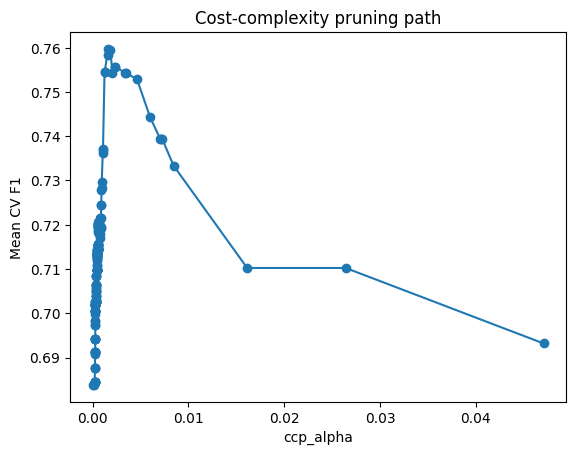

              precision    recall  f1-score   support

           0      0.931     0.831     0.878       971
           1      0.683     0.855     0.759       413

    accuracy                          0.838      1384
   macro avg      0.807     0.843     0.819      1384
weighted avg      0.857     0.838     0.843      1384



In [43]:
# Cost-complexity pruning path

# Get all possible ccp_alpha values on the training set
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(
    X_train, y_train
)
ccp_alphas = path.ccp_alphas[:-1]      # exclude the last alpha which prunes all leaves
mean_f1 = []

# Evaluate each subtree with 5-fold CV using F1-score
for alpha in ccp_alphas:
    dt_tmp = DecisionTreeClassifier(
        random_state=42,
        ccp_alpha=alpha,
        class_weight={0: 0.3, 1: 0.7}  # same class weights as the base model
    )
    scores = cross_val_score(
        dt_tmp, X_train, y_train,
        cv=5, scoring='f1'
    )
    mean_f1.append(scores.mean())

# Choose the alpha with the highest average F1
best_alpha = ccp_alphas[np.argmax(mean_f1)]
pruned_dt = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha,
    class_weight={0: 0.3, 1: 0.7}
).fit(X_train, y_train)

print(f'Best ccp_alpha: {best_alpha:.4f}')
print(f'Pruned depth: {pruned_dt.get_depth()}  |  Leaves: {pruned_dt.get_n_leaves()}')

# Plot F1 vs. alpha
plt.plot(ccp_alphas, mean_f1, marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean CV F1')
plt.title('Cost‑complexity pruning path')
plt.show()

# Evaluate on the test set for the final comparison
y_pred_pruned = pruned_dt.predict(X_test)
print(classification_report(y_test, y_pred_pruned, digits=3))

I initially applied a pre-pruning strategy by tuning `max_depth` and `min_samples_leaf` via GridSearchCV. This prevented the tree from becoming too deep, helping reduce overfitting. However, to further optimize the model’s complexity, I implemented post-pruning using cost-complexity pruning and selected the best `ccp_alpha` based on cross-validated F1 score.
If we compare between the pre-pruning (tuned) model and the post-pruning model on the test set, we notice that post-pruning improved almost all performance metrics — accuracy, F1-scores, and precision — at the cost of slightly lower recall on the positive class (from 0.90 to 0.855). This means the pruned model is more balanced and precise, but slightly less aggressive in identifying conversions. This suggests that cost-complexity pruning may not have been strictly necessary in this case.

## Building a Random Forest model

In [44]:
# Initialize and train the base Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight={0: 0.3, 1: 0.7},
    n_jobs=-1
)
rf.fit(X_train, y_train)          # Fit the model on the training data

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, n_jobs=-1,
                       random_state=42)

Random Forest (base) – Training performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2259
           1       1.00      1.00      1.00       963

    accuracy                           1.00      3222
   macro avg       1.00      1.00      1.00      3222
weighted avg       1.00      1.00      1.00      3222



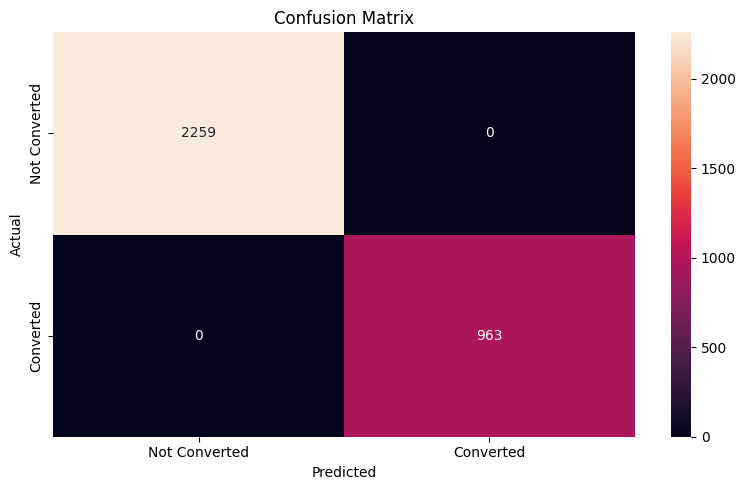


Random Forest (base) – Test performance
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       971
           1       0.78      0.69      0.73       413

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



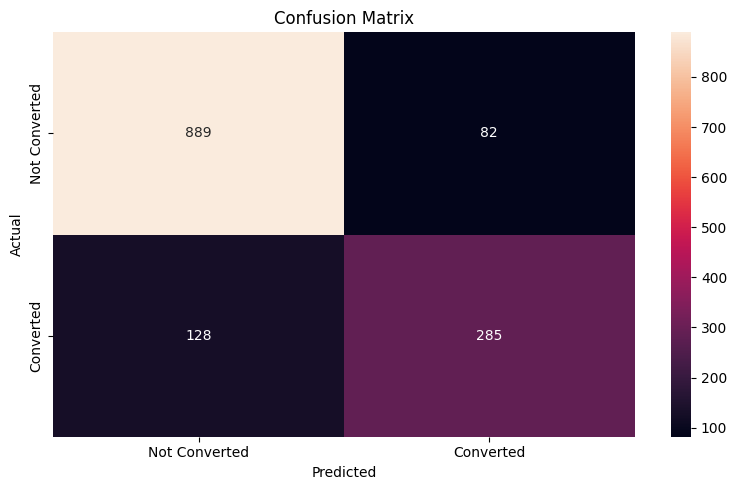

In [45]:
# Evaluate the base Random Forest model
print("Random Forest (base) – Training performance")
metrics_score(y_train, rf.predict(X_train))
print("\nRandom Forest (base) – Test performance")
metrics_score(y_test,  rf.predict(X_test))


On the training set, the Random Forest shows overfitting with perfect performance. On the test set, the overall accuracy is good (85 percent), but the comparison between the two classes reveals an imbalance: while the unconverted class achieves an f1-score of 0.89, the converted class stops at 0.73. This indicates that the model tends to favor the majority class, reducing its ability to correctly identify the most interesting leads for the business. More targeted tuning, such as on `class_weight` or number of trees, is therefore needed to improve the predictive ability on the positive class.

In [46]:
# Hyperparameter tuning for Random Forest
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth':    [3, 5, 7, None],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV to optimize for recall
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight={0:0.3,1:0.7}, n_jobs=-1),
    param_grid=param_rf,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Run the grid search on the training data
grid_rf.fit(X_train, y_train)

# Extract the best estimator found by grid search
best_rf = grid_rf.best_estimator_


Tuned Random Forest – best params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 100}
Tuned RF – Training performance
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2259
           1       0.65      0.89      0.75       963

    accuracy                           0.82      3222
   macro avg       0.80      0.84      0.81      3222
weighted avg       0.85      0.82      0.83      3222



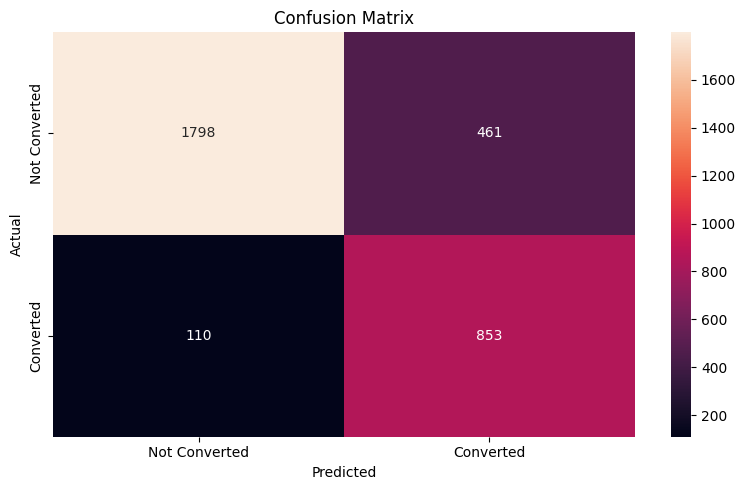


Tuned RF – Test performance
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       971
           1       0.66      0.89      0.76       413

    accuracy                           0.83      1384
   macro avg       0.80      0.85      0.81      1384
weighted avg       0.86      0.83      0.84      1384



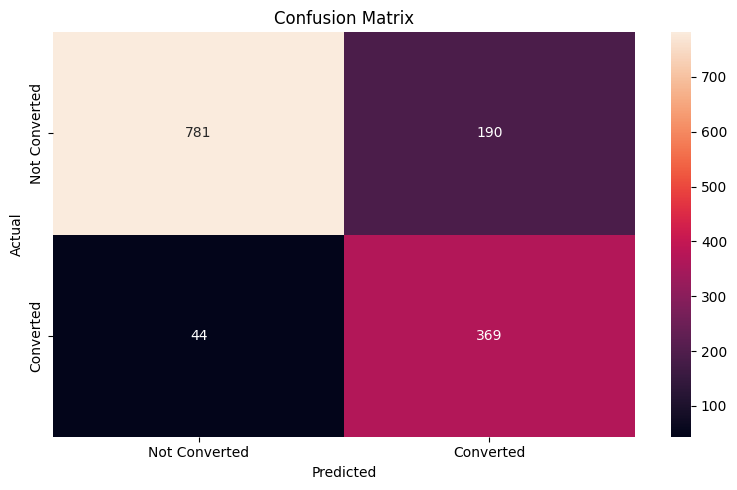

In [47]:
# Evaluate the optimized Random Forest model
print(f"\nTuned Random Forest – best params: {grid_rf.best_params_}")
print("Tuned RF – Training performance")
metrics_score(y_train, best_rf.predict(X_train))
print("\nTuned RF – Test performance")
metrics_score(y_test,  best_rf.predict(X_test))

After tuning, the Random Forest improves both in terms of class balance and generalization ability. On the training set, the accuracy is 82%, with an f1-score of 0.86 for unconverted and 0.75 for converted. This shows that the overfitting was reduced compared to the base model. The test set had similar results: an accuracy of 83%, an f1-score of 0.76 on the positive class, and a recall of 89%, indicating a strong ability of the model to intercept actually converted leads. The tuning thus produced a more balanced and reliable model that can identify leads to nurture with good accuracy.

One issue to consider with these ensemble models, however, is that we lose the ability to obtain an interpretation of the model.

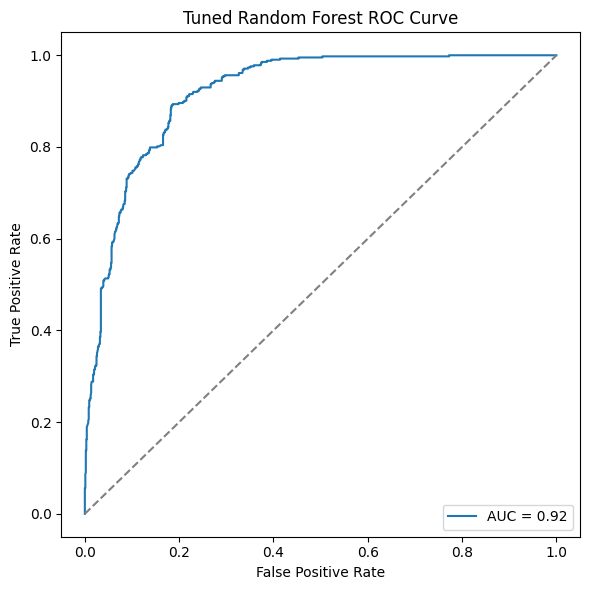

In [48]:
# Plot the ROC Curve and calculate AUC for the tuned Random Forest
y_proba = best_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.2f}")
plt.plot([0,1], [0,1], '--', color='grey')
plt.title("Tuned Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

The ROC curve of the optimized Random Forest shows excellent discriminating ability, with an AUC of 0.92, a value very close to the theoretical maximum of 1. This means that the model is highly effective in distinguishing between converted and unconverted leads, while maintaining a good trade-off between true positive and false positive rates. The large area under the curve confirms that the hyperparameter optimization has not only improved the accuracy and recall, but also the overall robustness of the classifier.

,Feature,Importance
2,time_spent_on_website,0.31488
11,first_interaction_Website,0.31308
13,profile_completed_Medium,0.17762
0,age,0.04649
9,current_occupation_Student,0.04458
14,last_activity_Phone Activity,0.03159
15,last_activity_Website Activity,0.02065
8,referral,0.01521
10,current_occupation_Unemployed,0.01085
12,profile_completed_Low,0.00813


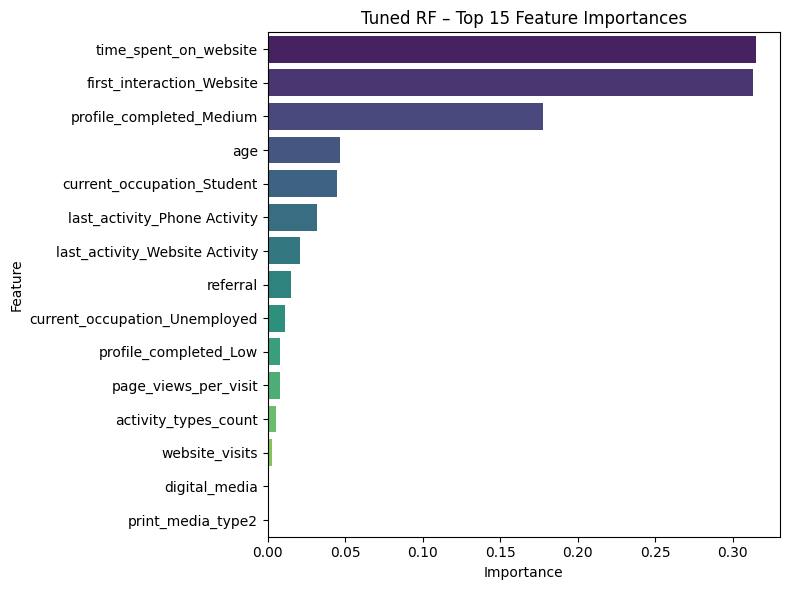

In [49]:
# Feature Importances
# Create a DataFrame of feature names and their importance scores
feat_imp_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

display(feat_imp_rf.head(15))

# Plot the top 15 feature importances as a horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp_rf.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Tuned RF – Top 15 Feature Importances")
plt.tight_layout()
plt.show()


The analysis of the most important features in the optimized Random Forest confirms the strong influence of `first_interaction_Website`, `time_spent_on_website` and `profile_completed_medium`, which already emerged as determinants in the Decision Tree. However, compared to the latter, the Random Forest values additional variables such as `age`, `current_occupation_Student` and `last_activity_Phone` activity. This shows that the model can capture more complex and distributed relationships. However, features such as `digital_media`, `print_media_type1`, and `educational_channels` have almost no impact. This suggests that traditional lead acquisition channels do not contribute to conversion prediction.

<Figure size 640x480 with 0 Axes>

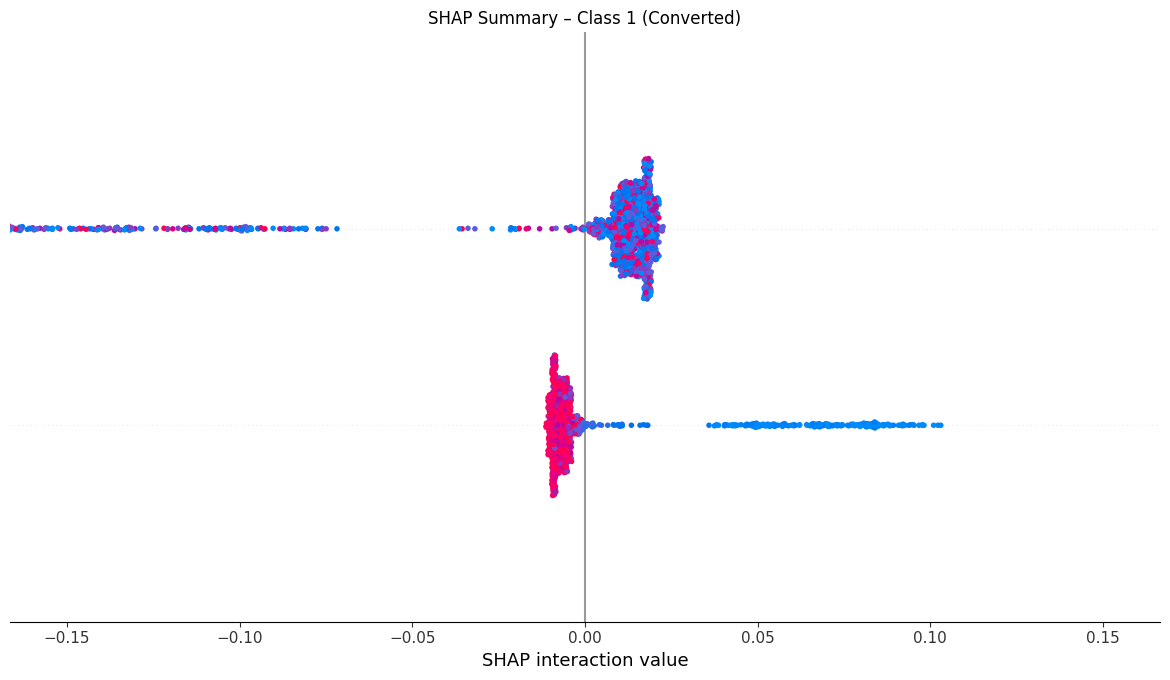

In [52]:
# Ensure X_test is a DataFrame with the right column names
if not isinstance(X_test, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
else:
    X_test_df = X_test.copy()

# Build the explainer
import shap
shap.initjs()

explainer = shap.TreeExplainer(best_rf)

# Get SHAP values
try:
    shap_values = explainer.shap_values(X_test_df)
    shap_matrix = shap_values[1] if isinstance(shap_values, list) else shap_values
except AttributeError:
    shap_explanation = explainer(X_test_df)
    shap_matrix = shap_explanation.values

# Double‑check the shapes match
assert shap_matrix.shape[1] == X_test_df.shape[1], \
       "Mismatch #features: SHAP vs. X_test"

# Summary plot
shap.summary_plot(shap_matrix, X_test_df, show=False)
plt.title('SHAP Summary – Class 1 (Converted)')
plt.show()

The SHAP summary plot reveals that nearly every prediction hinges on just two key variables, confirming the pattern already observed in the Decision Tree.

The broad upper “violin” corresponds to `first_interaction_Website`. When this variable is high (shown in red), the SHAP values shift markedly to the right, meaning it contributes positively to predicting conversion. Conversely, when the value is low (blue), the prediction is pushed downward. The second most influential feature is `time_spent_on_website`, which shows a similar trend: longer time spent on the website (red) pushes the SHAP values rightward, increasing the probability of conversion. Short visits (blue) push predictions in the opposite direction.
All other features cluster tightly around zero and have negligible impact, reinforcing the idea that the model relies heavily on just these two variables.

## Do we need to prune the tree?


I do not think so. I have already controlled the complexity of each tree as it grows by imposing limits on `max_depth` and `min_samples_leaf` via GridSearchCV (pre-pruning). In addition, the Random Forest further regularizes each tree by bootstrapping and a random feature selection mechanism (`max_features`). Therefore, no further pruning is required before the final evaluation.

**Final methodic consideration**:

Optimized **Random Forest** is the model with the best overall performance: AUC of 0.92, good balance between precision and recall, and better ability to capture complex patterns. However, it requires more resources and training time. **Tuned Decision Tree**, although with a slightly lower AUC (~0.88), offers higher interpretability, faster time and a very high recall (0.90) on the positive class.

In summary, Random Forest is ideal for maximizing accuracy in contexts where resources are not a constraint, while Decision Tree is preferable in light or real-time operational scenarios.

## Actionable Insights and Recommendations

A full-stack analysis—spanning user behavior, model outcomes, and feature dynamics—reveals concrete drivers of lead conversion. These recommendations translate intelligence into action across product, marketing, and sales.

**A. Rethink entry points**

	•	Leads who begin their journey on the website convert at significantly higher rates. But intent without structure leaks value.

*Recommendations*:

	•	Strip landing pages of noise: design for flow, not form.
	•	Replace passive CTAs with interactive entry points (e.g. assessments, “unlock now” previews).
	•	Rebuild the mobile experience end-to-end, as mobile friction leads to silent churn.

**B. Treat on-site behavior as a live signal**

	•	Time on site is a top predictive feature: leads spending >1,000 minutes convert >25% of the time.

*Recommendations*:

	•	Trigger high-context actions (smart popups, routing, tailored nudges) once behavioral thresholds are crossed.
	•	Build a real-time scoring layer to alert sales the moment engagement peaks.

**C. Design completion as value**

	•	High profile completion doubles conversion likelihood. Profile completion is not a formality, it’s a strategic asset.

*Recommendations*:

	•	Frame profile steps as unlocks: “You tell us this, we show you that.”
	•	Make progress visual, not passive. Show the benefits of each step.
	•	Gate key features or recommendations behind profile completion, not sign-up.

**D. Prioritize live, intent-driven channels**

	•	Channels like print and untargeted ads dilute effort. Live website interactions (chat, updates) outperform.

*Recommendations*:

	•	Cut underperforming spend and reinvest in intent-rich channels (e.g. referrals, live chat, search retargeting).
	•	Expand chat with a smart hybrid model aligned with peak traffic hours and behavioral cues.
	•	Build a full-funnel referral engine: warm leads convert faster and cheaper.

**E. Segment by mindset, not just occupation**

	•	Professionals remain the top converters (35.5%), but unemployed leads show strong potential (22%), a signal that purpose-driven journeys could unlock untapped intent.

*Recommendations*:

	•	Create conversion journeys tailored by role: student, jobseeker, professional.
	•	Personalize tone, urgency, financing options, and pacing by profile.
	•	Don’t just segment campaigns, segment the entire experience.

**F.  Let the model drive execution**

	•	Your Random Forest (AUC: 0.92) can predict who’s ready to convert. Use it operationally.

*Recommendations*:

	•	Feed conversion scores into the CRM to auto-prioritize outreach.
	•	Trigger callbacks, perks, or advisors for high-score buckets (e.g. 0.8–1.0).
	•	Study failed high-score leads to close feedback loops and improve model sharpness.

**G. Humanize the conversion journey**

	•	Conversion isn’t just about channels. It’s about emotional timing, perceived value, and personal resonance.
  
*Recommendations*:

	•	Use narrative design: showcase success stories from similar profiles to reduce friction and inspire action.
	•	Introduce guided support (mentors, advisors, bots) at emotional inflection points—especially when friction is high and motivation is uncertain.

**H. Analytics are only as valuable as their refresh rate**

	•	Even great models fade. Insight needs iteration.

*Recommendations*:

	•	Run a 90-day retraining and feature review cycle.
	•	Monitor decay: track what worked, what’s slipping, and what’s emerging.
	•	Use feature importance as a product roadmap: let the data inform where to act next.